# OF-driven Gaussian denoising

In [1]:
!which python

/home/vruiz/enviroments/SM/bin/python


In [2]:
!pip install --upgrade pip

In [3]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from ipywidgets import *
import cv2
import time
import kernels
import _2D_OF_denoising

In [4]:
try:
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image
except:
    !pip install "image_IO @ git+https://github.com/vicente-gonzalez-ruiz/image_IO"
    from image_IO import image_1 as gray_image
    from image_IO import image_3 as RGB_image

In [5]:
sigma = 0.5

[2.63865083e-04 1.06450772e-01 7.86570726e-01 1.06450772e-01
 2.63865083e-04]
1.0


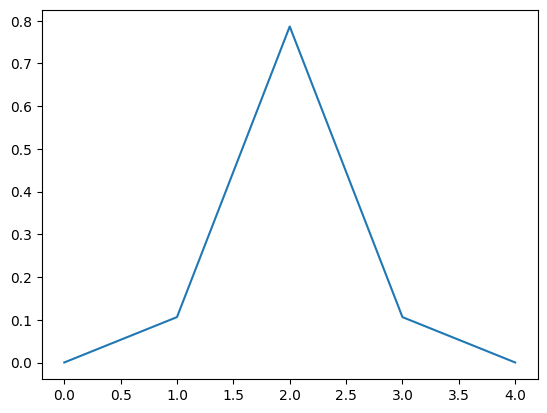

In [6]:
kernel = kernels.get_gaussian_kernel(sigma) #compute_gaussian_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [7]:
!wget http://www.hpca.ual.es/~vruiz/images/barb.png

--2023-01-22 23:06:49--  http://www.hpca.ual.es/~vruiz/images/barb.png
Resolviendo www.hpca.ual.es (www.hpca.ual.es)... 150.214.150.42
Conectando con www.hpca.ual.es (www.hpca.ual.es)[150.214.150.42]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 232140 (227K) [image/png]
Grabando a: «barb.png.9»

barb.png.9          100%[===================>] 226,70K  --.-KB/s    en 0,1s    

2023-01-22 23:06:49 (1,88 MB/s) - «barb.png.9» guardado [232140/232140]



In [8]:
img = gray_image.read("barb.png")

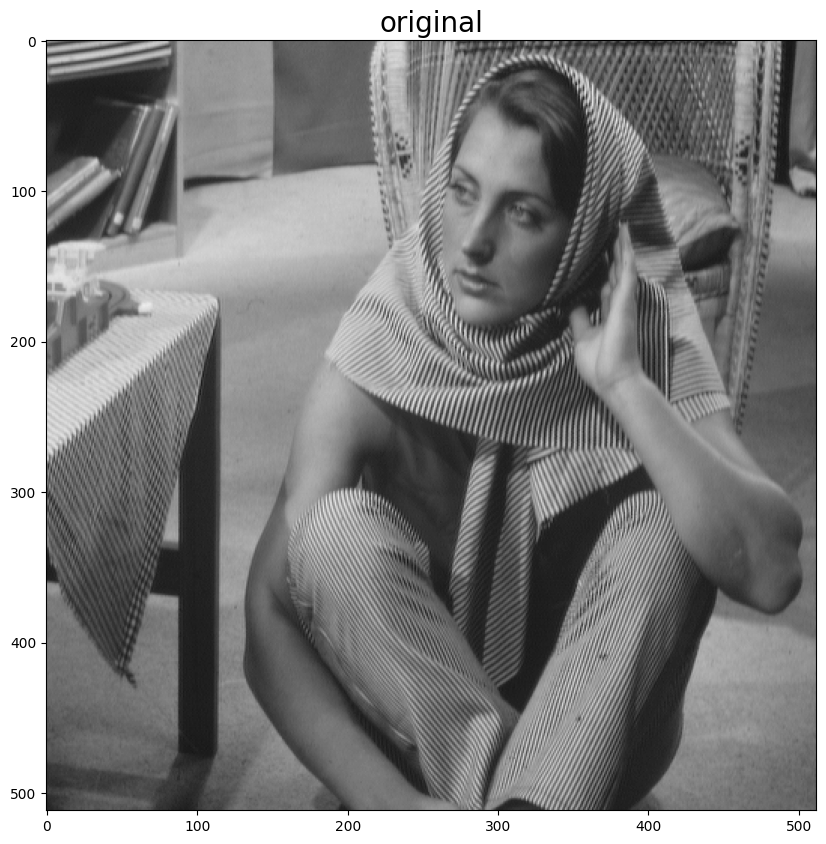

In [9]:
gray_image.show(img, "original")

In [10]:
mean = 0
var = 100
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape).astype(np.int16)
noisy_img = img + noise

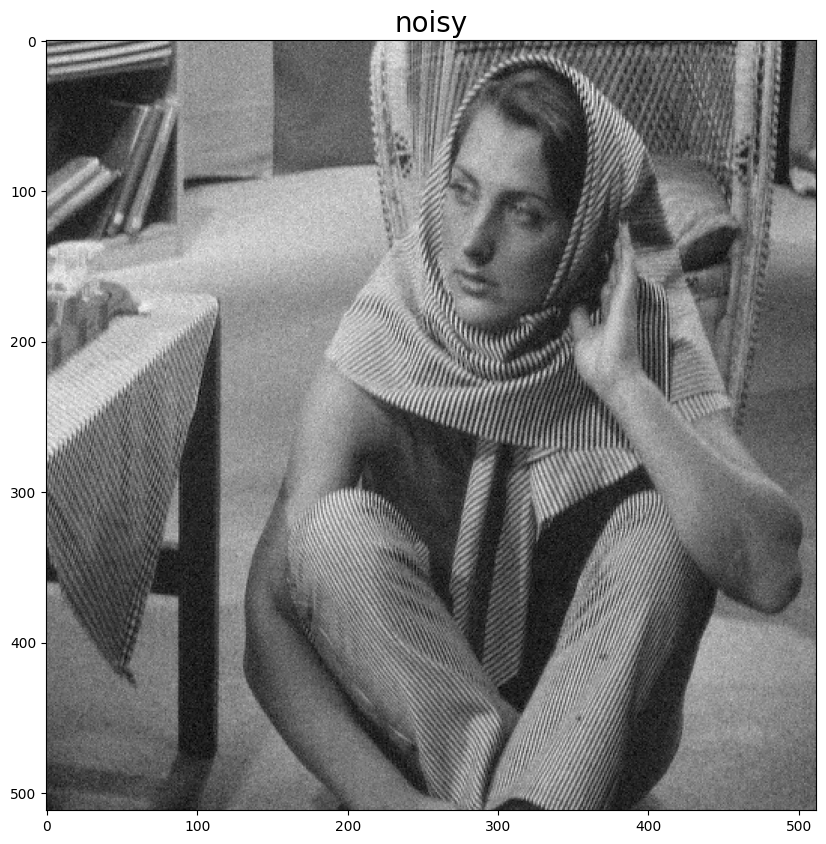

In [11]:
gray_image.show(noisy_img, "noisy")

In [12]:
denoised_img = _2D_OF_denoising.filter(noisy_img, kernel, l=0, w=3)

image.shape=(512, 512) kernel.shape=(5,) l=0 w=3
get_flow: reference = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
get_flow: target    = [153. 155. 145. 159. 168. 132. 156. 151. 129. 129.]
get_flow: flow = [[-2.8300945e-21  0.0000000e+00]
 [ 6.2804484e-19  0.0000000e+00]
 [ 7.0824968e-20  0.0000000e+00]
 [ 9.0871382e-18  0.0000000e+00]
 [ 8.8319340e-18  0.0000000e+00]
 [ 1.3244067e-16  0.0000000e+00]
 [ 2.6095361e-15  0.0000000e+00]
 [ 5.0464444e-15  0.0000000e+00]
 [ 2.5824089e-15  0.0000000e+00]
 [-5.2329187e-16  0.0000000e+00]]
get_flow: max = 5.493726e-14
get_flow: min = -9.498041e-14
get_flow: reference = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
get_flow: target    = [153. 155. 145. 159. 168. 132. 156. 151. 129. 129.]
get_flow: flow = [[-2.8300945e-21  0.0000000e+00]
 [ 6.2804484e-19  0.0000000e+00]
 [ 7.0824968e-20  0.0000000e+00]
 [ 9.0871382e-18  0.0000000e+00]
 [ 8.8319340e-18  0.0000000e+00]
 [ 1.3244067e-16  0.0000000e+00]
 [ 2.6095361e-15  0.0000000e+00]
 [ 5.0464444e-15  0.0000000e+00]
 [ 2.58

3 get_flow: reference = [81. 93. 71. 80. 74. 70. 68. 81. 77. 75.]
get_flow: target    = [110. 142. 132. 134. 145. 135. 140. 172. 172. 175.]
get_flow: flow = [[ 3.8193659e-20  0.0000000e+00]
 [-3.2748118e-18  0.0000000e+00]
 [-2.4538687e-18  0.0000000e+00]
 [ 1.3656157e-17  0.0000000e+00]
 [ 3.0086094e-16  0.0000000e+00]
 [ 6.8437276e-16  0.0000000e+00]
 [ 7.6999853e-16  0.0000000e+00]
 [-3.9778819e-15  0.0000000e+00]
 [-9.6877488e-15  0.0000000e+00]
 [-5.1713127e-15  0.0000000e+00]]
get_flow: max = 4.5367586e-14
get_flow: min = -8.5593736e-14
get_flow: reference = [ 67.  69.  61.  65.  71.  96.  81. 109. 107. 119.]
get_flow: target    = [110. 142. 132. 134. 145. 135. 140. 172. 172. 175.]
get_flow: flow = [[ 6.2181118e-20  0.0000000e+00]
 [ 1.4249169e-18  0.0000000e+00]
 [-6.3607344e-18  0.0000000e+00]
 [-1.1829760e-17  0.0000000e+00]
 [ 5.2540904e-17  0.0000000e+00]
 [ 2.0214653e-16  0.0000000e+00]
 [ 3.5165970e-16  0.0000000e+00]
 [-2.0227831e-15  0.0000000e+00]
 [-3.8244850e-15  0.00

7 get_flow: reference = [198. 197. 188. 190. 202. 192. 191. 165. 188. 154.]
get_flow: target    = [151. 133. 128. 122. 110.  90. 109.  93.  88.  86.]
get_flow: flow = [[ 2.0483781e-19  0.0000000e+00]
 [ 1.4596992e-17  0.0000000e+00]
 [ 2.9104009e-17  0.0000000e+00]
 [ 2.4747006e-18  0.0000000e+00]
 [-3.0190869e-16  0.0000000e+00]
 [-4.1190370e-16  0.0000000e+00]
 [-3.1689199e-16  0.0000000e+00]
 [ 1.8558847e-16  0.0000000e+00]
 [ 3.9670415e-16  0.0000000e+00]
 [ 2.0555547e-16  0.0000000e+00]]
get_flow: max = 5.631333e-14
get_flow: min = -1.3907357e-13
get_flow: reference = [191. 167. 180. 173. 162. 161. 159. 154. 134. 139.]
get_flow: target    = [151. 133. 128. 122. 110.  90. 109.  93.  88.  86.]
get_flow: flow = [[ 5.1310815e-19  0.0000000e+00]
 [ 1.6118195e-17  0.0000000e+00]
 [ 2.5767014e-17  0.0000000e+00]
 [ 5.2573540e-18  0.0000000e+00]
 [-3.8686377e-16  0.0000000e+00]
 [-5.6693032e-16  0.0000000e+00]
 [-4.4168290e-16  0.0000000e+00]
 [ 1.6900805e-16  0.0000000e+00]
 [ 5.8869933e

11 get_flow: reference = [ 67.  83.  99.  99.  83. 113. 112. 130. 117. 135.]
get_flow: target    = [130. 174. 167. 178. 171. 180. 194. 207. 180. 199.]
get_flow: flow = [[ 1.9838337e-19  0.0000000e+00]
 [-8.9712132e-19  0.0000000e+00]
 [-8.2469303e-18  0.0000000e+00]
 [-1.8779096e-17  0.0000000e+00]
 [ 7.1347352e-17  0.0000000e+00]
 [-2.6864293e-16  0.0000000e+00]
 [-1.8608828e-16  0.0000000e+00]
 [-2.1871328e-16  0.0000000e+00]
 [ 2.0759383e-16  0.0000000e+00]
 [ 1.7908235e-17  0.0000000e+00]]
get_flow: max = 2.0615152e-13
get_flow: min = -1.0000177e-13
get_flow: reference = [104. 133. 134. 135. 145. 150. 176. 168. 178. 165.]
get_flow: target    = [130. 174. 167. 178. 171. 180. 194. 207. 180. 199.]
get_flow: flow = [[ 4.52492972e-19  0.00000000e+00]
 [-2.43271068e-18  0.00000000e+00]
 [-1.20095714e-17  0.00000000e+00]
 [-3.28752843e-17  0.00000000e+00]
 [ 5.57302019e-17  0.00000000e+00]
 [-2.96778004e-16  0.00000000e+00]
 [-2.73775078e-16  0.00000000e+00]
 [-5.75271426e-16  0.00000000e

15 get_flow: reference = [140. 201. 211. 198. 200. 200. 197. 176. 189. 173.]
get_flow: target    = [ 85. 119. 115. 116.  82.  86.  94.  81.  95.  74.]
get_flow: flow = [[-1.0155204e-18  0.0000000e+00]
 [ 1.1842346e-16  0.0000000e+00]
 [ 4.1399866e-16  0.0000000e+00]
 [ 3.5531722e-16  0.0000000e+00]
 [-8.8830714e-17  0.0000000e+00]
 [-2.5011530e-16  0.0000000e+00]
 [-3.6515453e-16  0.0000000e+00]
 [-1.8096689e-17  0.0000000e+00]
 [-2.4929811e-17  0.0000000e+00]
 [ 4.0926223e-17  0.0000000e+00]]
get_flow: max = 8.7187344e-14
get_flow: min = -9.6354246e-14
get_flow: reference = [116. 183. 164. 154. 160. 138. 159. 136. 107. 110.]
get_flow: target    = [ 85. 119. 115. 116.  82.  86.  94.  81.  95.  74.]
get_flow: flow = [[ 1.4922747e-20  0.0000000e+00]
 [ 4.8885204e-18  0.0000000e+00]
 [ 7.2616604e-17  0.0000000e+00]
 [ 5.3858742e-17  0.0000000e+00]
 [-1.2241102e-16  0.0000000e+00]
 [-4.9130690e-16  0.0000000e+00]
 [-7.8769405e-16  0.0000000e+00]
 [-3.0935991e-16  0.0000000e+00]
 [-3.016830

19 get_flow: reference = [106. 113. 100. 124. 127. 121. 115. 119. 134. 153.]
get_flow: target    = [123. 117. 135. 156. 166. 167. 173. 155. 179. 164.]
get_flow: flow = [[ 9.3424343e-19  0.0000000e+00]
 [ 1.3975211e-17  0.0000000e+00]
 [ 1.4798321e-18  0.0000000e+00]
 [-7.7357282e-17  0.0000000e+00]
 [-5.8293977e-16  0.0000000e+00]
 [-5.8233092e-16  0.0000000e+00]
 [-1.7465043e-15  0.0000000e+00]
 [-1.5014332e-15  0.0000000e+00]
 [-3.5864309e-16  0.0000000e+00]
 [ 3.0378693e-15  0.0000000e+00]]
get_flow: max = 1.1207261e-13
get_flow: min = -7.929731e-14
get_flow: reference = [106. 128. 115. 143. 168. 160. 154. 163. 162. 145.]
get_flow: target    = [123. 117. 135. 156. 166. 167. 173. 155. 179. 164.]
get_flow: flow = [[ 9.1465103e-19  0.0000000e+00]
 [ 2.3813574e-17  0.0000000e+00]
 [ 7.0919538e-18  0.0000000e+00]
 [-8.1691722e-17  0.0000000e+00]
 [-6.7408936e-16  0.0000000e+00]
 [-5.7413116e-16  0.0000000e+00]
 [-4.4601954e-16  0.0000000e+00]
 [ 1.5689022e-16  0.0000000e+00]
 [ 1.5385210

23 get_flow: reference = [133. 113. 145. 158. 135. 132. 134. 132. 118. 114.]
get_flow: target    = [105.  95.  74.  85.  94.  93.  75.  86.  83.  57.]
get_flow: flow = [[-9.8550479e-20  0.0000000e+00]
 [-1.1875008e-17  0.0000000e+00]
 [-1.3336112e-17  0.0000000e+00]
 [-2.2135512e-17  0.0000000e+00]
 [ 9.2100616e-19  0.0000000e+00]
 [ 4.9375977e-19  0.0000000e+00]
 [ 1.4523313e-18  0.0000000e+00]
 [-3.0933660e-18  0.0000000e+00]
 [ 6.5839183e-17  0.0000000e+00]
 [ 1.6643638e-17  0.0000000e+00]]
get_flow: max = 9.005392e-14
get_flow: min = -8.000064e-14
get_flow: reference = [133.  95.  84. 100. 103. 106.  80.  77.  79.  87.]
get_flow: target    = [105.  95.  74.  85.  94.  93.  75.  86.  83.  57.]
get_flow: flow = [[ 2.42407941e-19  0.00000000e+00]
 [-2.35403401e-18  0.00000000e+00]
 [-2.62920909e-18  0.00000000e+00]
 [-3.95480634e-18  0.00000000e+00]
 [-3.71360552e-17  0.00000000e+00]
 [-2.32887457e-17  0.00000000e+00]
 [-3.51205635e-17  0.00000000e+00]
 [-1.03507803e-16  0.00000000e+0

get_flow: flow = [[ 3.4315069e-18  0.0000000e+00]
 [ 3.6866650e-18  0.0000000e+00]
 [-2.2224397e-18  0.0000000e+00]
 [-3.9408552e-17  0.0000000e+00]
 [-1.2283876e-16  0.0000000e+00]
 [-2.0968980e-16  0.0000000e+00]
 [-1.1357301e-16  0.0000000e+00]
 [-2.5114304e-17  0.0000000e+00]
 [ 6.3177718e-18  0.0000000e+00]
 [-8.8703871e-19  0.0000000e+00]]
get_flow: max = 7.2610897e-14
get_flow: min = -4.0721244e-14
27 get_flow: reference = [132. 132. 101.  93.  90.  91.  74.  81.  70.  95.]
get_flow: target    = [85. 86. 70. 58. 64. 38. 49. 54. 34. 18.]
get_flow: flow = [[ 4.3568701e-21  0.0000000e+00]
 [ 1.2006195e-18  0.0000000e+00]
 [ 9.8998558e-19  0.0000000e+00]
 [-8.5798225e-18  0.0000000e+00]
 [-8.0703426e-17  0.0000000e+00]
 [-1.1372299e-16  0.0000000e+00]
 [ 8.5365502e-18  0.0000000e+00]
 [-1.7386979e-16  0.0000000e+00]
 [-1.6458902e-16  0.0000000e+00]
 [-1.2898554e-16  0.0000000e+00]]
get_flow: max = 1.6123427e-13
get_flow: min = -3.97481e-13
get_flow: reference = [120. 101.  94.  69. 

31 get_flow: reference = [40. 30. 30. 30. 49.  6. 43. 33. 41. 54.]
get_flow: target    = [35. 26. 36. 24. 20. 41. 38. 18. 31. 34.]
get_flow: flow = [[-6.7986179e-22  0.0000000e+00]
 [-7.0668004e-20  0.0000000e+00]
 [-1.4210759e-19  0.0000000e+00]
 [ 7.7077269e-19  0.0000000e+00]
 [-9.5801670e-19  0.0000000e+00]
 [-2.2309121e-18  0.0000000e+00]
 [-1.1802779e-17  0.0000000e+00]
 [-2.3810291e-18  0.0000000e+00]
 [-2.7418101e-17  0.0000000e+00]
 [-4.7942442e-17  0.0000000e+00]]
get_flow: max = 4.0760327e-14
get_flow: min = -7.711008e-14
get_flow: reference = [31. 17. 40. 43. 25. 39. 27. 37. 31. 31.]
get_flow: target    = [35. 26. 36. 24. 20. 41. 38. 18. 31. 34.]
get_flow: flow = [[-1.29005814e-21  0.00000000e+00]
 [ 5.65280445e-19  0.00000000e+00]
 [ 6.21894444e-19  0.00000000e+00]
 [ 1.04367942e-18  0.00000000e+00]
 [-1.91393112e-18  0.00000000e+00]
 [-1.48024984e-18  0.00000000e+00]
 [-5.69451151e-18  0.00000000e+00]
 [ 1.03240065e-17  0.00000000e+00]
 [-1.82798912e-18  0.00000000e+00]
 

35 get_flow: reference = [42. 40. 48. 38. 48. 24. 37. 16. 29. 37.]
get_flow: target    = [15. 38. 41. 35. 40. 35. 25. 22. 10. 22.]
get_flow: flow = [[ 1.15573255e-20  0.00000000e+00]
 [-1.39729169e-18  0.00000000e+00]
 [-4.81029845e-18  0.00000000e+00]
 [-4.11579554e-18  0.00000000e+00]
 [ 1.06436779e-17  0.00000000e+00]
 [ 1.22772049e-18  0.00000000e+00]
 [-1.53605157e-17  0.00000000e+00]
 [-2.10397310e-17  0.00000000e+00]
 [-1.40465045e-17  0.00000000e+00]
 [-1.18326938e-17  0.00000000e+00]]
get_flow: max = 5.7111976e-14
get_flow: min = -8.9156296e-14
get_flow: reference = [40. 27. 52. 34. 20. 31. 23. 32. 15. 40.]
get_flow: target    = [15. 38. 41. 35. 40. 35. 25. 22. 10. 22.]
get_flow: flow = [[ 8.5561212e-21  0.0000000e+00]
 [-2.1644086e-18  0.0000000e+00]
 [-7.5007166e-18  0.0000000e+00]
 [-5.9530634e-18  0.0000000e+00]
 [ 8.9522730e-18  0.0000000e+00]
 [ 1.2990283e-18  0.0000000e+00]
 [-1.2515537e-17  0.0000000e+00]
 [-2.8077690e-17  0.0000000e+00]
 [-2.5980661e-17  0.0000000e+00

39 get_flow: reference = [26. 38. 31. 38. 48. 40. 16. 51. 25. 17.]
get_flow: target    = [57. 27. 51. 55.  8. 38. 13. 31. 60. 27.]
get_flow: flow = [[-2.5713562e-21  0.0000000e+00]
 [ 2.6086839e-19  0.0000000e+00]
 [ 2.6610404e-18  0.0000000e+00]
 [ 5.2720348e-18  0.0000000e+00]
 [-3.4909429e-18  0.0000000e+00]
 [ 3.6148034e-17  0.0000000e+00]
 [ 2.0646370e-17  0.0000000e+00]
 [ 8.1918343e-18  0.0000000e+00]
 [-1.5049377e-17  0.0000000e+00]
 [-3.6678671e-17  0.0000000e+00]]
get_flow: max = 1.5217288e-13
get_flow: min = -1.1199092e-13
get_flow: reference = [33. 16. 41. 32. 47. 30. 31. 36. 34. 23.]
get_flow: target    = [57. 27. 51. 55.  8. 38. 13. 31. 60. 27.]
get_flow: flow = [[-4.7250968e-21  0.0000000e+00]
 [ 5.4118550e-19  0.0000000e+00]
 [ 1.7901119e-18  0.0000000e+00]
 [ 8.2507196e-18  0.0000000e+00]
 [-8.8692563e-18  0.0000000e+00]
 [ 3.0741760e-17  0.0000000e+00]
 [ 1.4109245e-17  0.0000000e+00]
 [ 7.9202701e-18  0.0000000e+00]
 [-8.8269370e-18  0.0000000e+00]
 [-9.4842453e-18  

43 get_flow: reference = [32. 32. 41. 19. 36. 22. 34. 34. 36. 28.]
get_flow: target    = [23. 47. 44. 34. 33. 40. 33. 36. 32. 30.]
get_flow: flow = [[-8.8659322e-22  0.0000000e+00]
 [-1.8503940e-20  0.0000000e+00]
 [-6.6158073e-20  0.0000000e+00]
 [-2.1147145e-19  0.0000000e+00]
 [-7.6464622e-19  0.0000000e+00]
 [ 4.8484142e-19  0.0000000e+00]
 [ 2.5069156e-18  0.0000000e+00]
 [ 2.8963340e-18  0.0000000e+00]
 [ 1.7797707e-18  0.0000000e+00]
 [-3.8417436e-18  0.0000000e+00]]
get_flow: max = 8.64756e-14
get_flow: min = -6.5641835e-14
get_flow: reference = [23. 32. 37. 26. 32. 33. 40. 46. 40. 35.]
get_flow: target    = [23. 47. 44. 34. 33. 40. 33. 36. 32. 30.]
get_flow: flow = [[ 1.73810640e-21  0.00000000e+00]
 [ 1.72140085e-19  0.00000000e+00]
 [ 1.08317104e-19  0.00000000e+00]
 [-1.52936247e-19  0.00000000e+00]
 [-2.33118858e-19  0.00000000e+00]
 [ 1.19243845e-18  0.00000000e+00]
 [ 2.63572996e-18  0.00000000e+00]
 [ 5.03867185e-18  0.00000000e+00]
 [ 1.38581766e-18  0.00000000e+00]
 [

47 get_flow: reference = [36. 28. 37. 37. 23. 45. 48. 28. 37. 22.]
get_flow: target    = [38. 20. 44. 38. 23. 28. 36. 47. 23. 27.]
get_flow: flow = [[ 2.9437956e-20  0.0000000e+00]
 [-5.3953864e-19  0.0000000e+00]
 [-1.1806974e-20  0.0000000e+00]
 [-3.9481451e-18  0.0000000e+00]
 [ 3.5219254e-18  0.0000000e+00]
 [-1.3920732e-17  0.0000000e+00]
 [-1.3467529e-17  0.0000000e+00]
 [-7.9331352e-17  0.0000000e+00]
 [-6.4020276e-18  0.0000000e+00]
 [-5.1289198e-17  0.0000000e+00]]
get_flow: max = 1.594313e-13
get_flow: min = -2.038119e-13
get_flow: reference = [32. 17. 42. 28. 51. 44. 56. 39. 33. 40.]
get_flow: target    = [38. 20. 44. 38. 23. 28. 36. 47. 23. 27.]
get_flow: flow = [[ 7.6460584e-22  0.0000000e+00]
 [ 2.7014522e-19  0.0000000e+00]
 [ 2.3904008e-18  0.0000000e+00]
 [ 2.5849324e-18  0.0000000e+00]
 [ 6.0016863e-18  0.0000000e+00]
 [-1.6776647e-17  0.0000000e+00]
 [-2.2204229e-17  0.0000000e+00]
 [-1.1636022e-16  0.0000000e+00]
 [ 5.3285675e-17  0.0000000e+00]
 [ 1.7454910e-16  0.

51 get_flow: reference = [49. 26. 53. 42. 32. 30. 46. 29. 38. 51.]
get_flow: target    = [33. 46. 32. 29. 37. 40. 30. 33. 41. 36.]
get_flow: flow = [[ 7.0684861e-21  0.0000000e+00]
 [ 8.3434033e-21  0.0000000e+00]
 [-2.8943496e-20  0.0000000e+00]
 [ 1.5427231e-19  0.0000000e+00]
 [ 5.1971339e-19  0.0000000e+00]
 [ 1.6424911e-19  0.0000000e+00]
 [ 1.1472143e-18  0.0000000e+00]
 [-5.8188873e-19  0.0000000e+00]
 [ 2.7671102e-18  0.0000000e+00]
 [ 2.4322382e-17  0.0000000e+00]]
get_flow: max = 1.5761203e-13
get_flow: min = -9.480721e-14
get_flow: reference = [42. 39. 36. 18. 45. 56. 39. 37. 41. 63.]
get_flow: target    = [33. 46. 32. 29. 37. 40. 30. 33. 41. 36.]
get_flow: flow = [[ 3.8441447e-22  0.0000000e+00]
 [-1.4851225e-19  0.0000000e+00]
 [-7.1988190e-19  0.0000000e+00]
 [-1.3251539e-18  0.0000000e+00]
 [ 4.7261845e-18  0.0000000e+00]
 [ 8.5117605e-18  0.0000000e+00]
 [ 1.1199082e-17  0.0000000e+00]
 [ 1.2586088e-18  0.0000000e+00]
 [ 6.9138539e-18  0.0000000e+00]
 [ 3.8423684e-17  0

get_flow: flow = [[ 1.6550551e-20  0.0000000e+00]
 [-9.8549316e-20  0.0000000e+00]
 [ 6.0913554e-20  0.0000000e+00]
 [ 3.9136942e-19  0.0000000e+00]
 [ 9.1487549e-18  0.0000000e+00]
 [ 5.9964209e-18  0.0000000e+00]
 [ 3.1439108e-19  0.0000000e+00]
 [-3.0368942e-18  0.0000000e+00]
 [-1.3351194e-17  0.0000000e+00]
 [-7.6158842e-18  0.0000000e+00]]
get_flow: max = 5.2368954e-14
get_flow: min = -8.586775e-14
55 get_flow: reference = [40. 31. 39. 43. 52. 51. 35. 31. 31. 45.]
get_flow: target    = [32. 49. 44. 61. 48. 26. 35. 49. 57. 27.]
get_flow: flow = [[ 8.4111525e-20  0.0000000e+00]
 [-1.8991055e-19  0.0000000e+00]
 [ 2.6523468e-18  0.0000000e+00]
 [ 5.1140355e-18  0.0000000e+00]
 [-1.6664814e-18  0.0000000e+00]
 [ 2.0968759e-17  0.0000000e+00]
 [ 2.1876484e-17  0.0000000e+00]
 [ 5.3378600e-17  0.0000000e+00]
 [ 1.0998325e-17  0.0000000e+00]
 [ 9.9381011e-18  0.0000000e+00]]
get_flow: max = 3.4896463e-14
get_flow: min = -6.5441976e-14
get_flow: reference = [50. 39. 63. 48. 49. 39. 46. 3

59 get_flow: reference = [47. 50. 51. 54. 52. 54. 55. 37. 44. 25.]
get_flow: target    = [38. 46. 63. 41. 48. 51. 42. 53. 36. 32.]
get_flow: flow = [[ 2.2356101e-20  0.0000000e+00]
 [-4.1614917e-20  0.0000000e+00]
 [ 9.1322484e-20  0.0000000e+00]
 [ 3.5609867e-19  0.0000000e+00]
 [-5.9687604e-18  0.0000000e+00]
 [-1.7714784e-17  0.0000000e+00]
 [-1.8733853e-17  0.0000000e+00]
 [-1.9666667e-17  0.0000000e+00]
 [ 3.2574416e-17  0.0000000e+00]
 [ 4.1460800e-17  0.0000000e+00]]
get_flow: max = 5.382507e-13
get_flow: min = -1.5456533e-13
get_flow: reference = [49. 49. 47. 61. 62. 57. 51. 50. 37. 46.]
get_flow: target    = [38. 46. 63. 41. 48. 51. 42. 53. 36. 32.]
get_flow: flow = [[ 2.7111374e-20  0.0000000e+00]
 [ 1.5768588e-20  0.0000000e+00]
 [ 2.0230755e-18  0.0000000e+00]
 [ 3.9723575e-18  0.0000000e+00]
 [-7.3466716e-18  0.0000000e+00]
 [-1.1602390e-17  0.0000000e+00]
 [-1.2227857e-18  0.0000000e+00]
 [-2.5704913e-18  0.0000000e+00]
 [-2.6390964e-18  0.0000000e+00]
 [-6.0381922e-18  0

63 get_flow: reference = [58. 40. 66. 58. 30. 51. 39. 58. 27. 25.]
get_flow: target    = [50. 47. 65. 30. 40. 48. 51. 40. 44. 50.]
get_flow: flow = [[ 2.5188900e-20  0.0000000e+00]
 [ 9.4094762e-19  0.0000000e+00]
 [ 5.9606030e-19  0.0000000e+00]
 [ 3.3804392e-18  0.0000000e+00]
 [ 6.1847351e-18  0.0000000e+00]
 [-2.8360361e-18  0.0000000e+00]
 [-4.8177543e-17  0.0000000e+00]
 [-2.0067600e-17  0.0000000e+00]
 [ 2.2700058e-17  0.0000000e+00]
 [ 1.2914922e-17  0.0000000e+00]]
get_flow: max = 1.3457685e-13
get_flow: min = -1.0752512e-13
get_flow: reference = [64. 37. 66. 62. 28. 62. 33. 40. 41. 22.]
get_flow: target    = [50. 47. 65. 30. 40. 48. 51. 40. 44. 50.]
get_flow: flow = [[ 2.2293858e-20  0.0000000e+00]
 [ 5.7677779e-19  0.0000000e+00]
 [ 1.8501143e-18  0.0000000e+00]
 [ 5.2664294e-18  0.0000000e+00]
 [-2.2107146e-18  0.0000000e+00]
 [-1.0878801e-17  0.0000000e+00]
 [-2.5983962e-17  0.0000000e+00]
 [-2.1137845e-17  0.0000000e+00]
 [ 6.4036286e-18  0.0000000e+00]
 [ 4.1254980e-18  

67 get_flow: reference = [57. 34. 42. 44. 39. 31. 24. 39. 31. 34.]
get_flow: target    = [70. 37. 45. 55. 45. 58. 44. 53. 39. 34.]
get_flow: flow = [[ 4.39488168e-21  0.00000000e+00]
 [ 2.39794335e-19  0.00000000e+00]
 [-3.39875641e-19  0.00000000e+00]
 [-2.23689283e-18  0.00000000e+00]
 [ 2.66040517e-19  0.00000000e+00]
 [ 2.30166413e-17  0.00000000e+00]
 [ 4.92349316e-17  0.00000000e+00]
 [ 1.28735492e-17  0.00000000e+00]
 [-4.23814714e-18  0.00000000e+00]
 [-1.08981674e-17  0.00000000e+00]]
get_flow: max = 1.1837032e-13
get_flow: min = -8.3452335e-14
get_flow: reference = [76. 64. 51. 48. 56. 47. 47. 41. 28. 45.]
get_flow: target    = [70. 37. 45. 55. 45. 58. 44. 53. 39. 34.]
get_flow: flow = [[-2.1424719e-20  0.0000000e+00]
 [ 3.4107521e-18  0.0000000e+00]
 [ 9.1642397e-18  0.0000000e+00]
 [ 9.8839108e-18  0.0000000e+00]
 [-9.2537481e-18  0.0000000e+00]
 [-1.7035990e-17  0.0000000e+00]
 [ 3.0816155e-18  0.0000000e+00]
 [-1.5726065e-20  0.0000000e+00]
 [-4.6363395e-18  0.0000000e+00

71 get_flow: reference = [38. 62. 55. 36. 54. 45. 45. 25. 35. 33.]
get_flow: target    = [50. 57. 41. 63. 48. 42. 43. 42. 43. 13.]
get_flow: flow = [[ 1.0458966e-21  0.0000000e+00]
 [-4.4331378e-20  0.0000000e+00]
 [ 1.4486031e-19  0.0000000e+00]
 [ 9.4843712e-19  0.0000000e+00]
 [-1.0601117e-18  0.0000000e+00]
 [-1.7781213e-18  0.0000000e+00]
 [ 1.8794147e-17  0.0000000e+00]
 [-1.9120960e-17  0.0000000e+00]
 [-2.2198528e-17  0.0000000e+00]
 [-2.7460355e-18  0.0000000e+00]]
get_flow: max = 5.692835e-14
get_flow: min = -1.09207395e-13
get_flow: reference = [45. 56. 56. 50. 58. 51. 48. 30. 29. 32.]
get_flow: target    = [50. 57. 41. 63. 48. 42. 43. 42. 43. 13.]
get_flow: flow = [[-1.6816398e-21  0.0000000e+00]
 [ 7.2946292e-20  0.0000000e+00]
 [ 1.4555368e-18  0.0000000e+00]
 [ 3.2577417e-18  0.0000000e+00]
 [-5.4695738e-18  0.0000000e+00]
 [-1.1513260e-17  0.0000000e+00]
 [ 2.5197948e-18  0.0000000e+00]
 [-1.0187040e-17  0.0000000e+00]
 [-8.2213307e-18  0.0000000e+00]
 [-1.6116937e-18  

get_flow: flow = [[ 1.48279896e-20  0.00000000e+00]
 [ 1.47819812e-18  0.00000000e+00]
 [ 1.16237681e-19  0.00000000e+00]
 [-8.73913422e-19  0.00000000e+00]
 [-1.02122014e-17  0.00000000e+00]
 [-2.27396128e-18  0.00000000e+00]
 [-1.07016616e-17  0.00000000e+00]
 [-8.23677503e-18  0.00000000e+00]
 [-1.51510223e-17  0.00000000e+00]
 [-1.02436169e-17  0.00000000e+00]]
get_flow: max = 5.7425513e-14
get_flow: min = -4.3376364e-14
75 get_flow: reference = [60. 50. 47. 39. 62. 25. 56. 50. 33. 52.]
get_flow: target    = [43. 55. 61. 46. 55. 37. 44. 41. 40. 41.]
get_flow: flow = [[-3.4611062e-21  0.0000000e+00]
 [-7.0886713e-21  0.0000000e+00]
 [ 3.5533655e-19  0.0000000e+00]
 [ 1.0602697e-18  0.0000000e+00]
 [-7.9328192e-18  0.0000000e+00]
 [-1.2754797e-17  0.0000000e+00]
 [-3.3719270e-17  0.0000000e+00]
 [ 1.4035234e-18  0.0000000e+00]
 [ 4.3596726e-17  0.0000000e+00]
 [ 1.7629977e-17  0.0000000e+00]]
get_flow: max = 5.6747223e-14
get_flow: min = -1.2689758e-13
get_flow: reference = [43. 70. 

get_flow: reference = [53. 36. 65. 50. 44. 61. 49. 38. 61. 49.]
get_flow: target    = [41. 45. 62. 37. 39. 32. 68. 45. 40. 41.]
get_flow: flow = [[ 1.7885755e-21  0.0000000e+00]
 [ 2.3173845e-19  0.0000000e+00]
 [ 2.4378900e-19  0.0000000e+00]
 [ 1.7434666e-18  0.0000000e+00]
 [ 4.7863284e-18  0.0000000e+00]
 [-1.2818567e-17  0.0000000e+00]
 [-1.2333775e-17  0.0000000e+00]
 [-8.1752027e-17  0.0000000e+00]
 [ 8.2319923e-17  0.0000000e+00]
 [-1.3446253e-17  0.0000000e+00]]
get_flow: max = 2.1539831e-13
get_flow: min = -1.0029147e-13
79 get_flow: reference = [41. 55. 46. 52. 37. 53. 40. 38. 25. 45.]
get_flow: target    = [36. 47. 32. 48. 42. 41. 42. 39. 45. 62.]
get_flow: flow = [[ 2.9101123e-23  0.0000000e+00]
 [ 3.5823259e-22  0.0000000e+00]
 [-6.0381406e-21  0.0000000e+00]
 [-5.2940519e-20  0.0000000e+00]
 [-4.1802955e-19  0.0000000e+00]
 [ 3.2430333e-18  0.0000000e+00]
 [ 3.6082121e-17  0.0000000e+00]
 [ 1.8667774e-16  0.0000000e+00]
 [ 8.5151084e-17  0.0000000e+00]
 [ 3.4886442e-17  

get_flow: flow = [[-2.5623327e-20  0.0000000e+00]
 [ 8.2934560e-19  0.0000000e+00]
 [ 1.3574922e-18  0.0000000e+00]
 [ 2.8193502e-18  0.0000000e+00]
 [ 4.8359072e-19  0.0000000e+00]
 [-3.3472356e-17  0.0000000e+00]
 [-2.9329135e-17  0.0000000e+00]
 [-7.5339850e-18  0.0000000e+00]
 [ 1.7785568e-17  0.0000000e+00]
 [ 5.9117864e-17  0.0000000e+00]]
get_flow: max = 6.828199e-14
get_flow: min = -7.102996e-14
get_flow: reference = [39. 50. 50. 40. 57. 66. 39. 73. 43. 71.]
get_flow: target    = [55. 45. 38. 40. 37. 39. 56. 45. 44. 45.]
get_flow: flow = [[ 5.0479146e-20  0.0000000e+00]
 [-4.4884583e-19  0.0000000e+00]
 [-3.0158683e-18  0.0000000e+00]
 [-4.2540166e-18  0.0000000e+00]
 [-1.0099676e-17  0.0000000e+00]
 [-1.8664975e-17  0.0000000e+00]
 [-5.0842114e-17  0.0000000e+00]
 [-2.1888681e-16  0.0000000e+00]
 [-4.1900113e-16  0.0000000e+00]
 [-2.3649438e-16  0.0000000e+00]]
get_flow: max = 6.930324e-14
get_flow: min = -1.0706716e-13
83 get_flow: reference = [29. 52. 48. 56. 34. 33. 65. 42.

get_flow: reference = [ 64.  55.  41.  75.  82.  67. 102. 112. 132. 111.]
get_flow: target    = [ 52.  50.  50.  57.  76.  70.  67. 108. 102. 101.]
get_flow: flow = [[ 6.8198625e-20  0.0000000e+00]
 [ 5.5492905e-19  0.0000000e+00]
 [ 2.6638818e-18  0.0000000e+00]
 [ 2.1832601e-18  0.0000000e+00]
 [ 7.4748474e-17  0.0000000e+00]
 [ 2.7544879e-16  0.0000000e+00]
 [ 1.2393045e-16  0.0000000e+00]
 [-5.2114041e-16  0.0000000e+00]
 [-8.0141805e-16  0.0000000e+00]
 [-2.3570005e-15  0.0000000e+00]]
get_flow: max = 9.6564914e-14
get_flow: min = -6.730471e-14
get_flow: reference = [ 51.  54.  56.  74.  89. 110. 107. 136. 135. 124.]
get_flow: target    = [ 52.  50.  50.  57.  76.  70.  67. 108. 102. 101.]
get_flow: flow = [[-4.2471214e-20  0.0000000e+00]
 [-1.0065247e-18  0.0000000e+00]
 [-3.4368904e-18  0.0000000e+00]
 [-4.4325668e-18  0.0000000e+00]
 [ 2.1023264e-16  0.0000000e+00]
 [ 8.5489325e-16  0.0000000e+00]
 [ 1.4768230e-16  0.0000000e+00]
 [-1.6673207e-15  0.0000000e+00]
 [-1.7837489e-1

get_flow: reference = [ 65.  93.  92. 110. 120. 115. 113. 125. 116. 122.]
get_flow: target    = [ 98.  97. 105. 110. 122. 105. 111. 122. 120. 136.]
get_flow: flow = [[ 3.71377276e-20  0.00000000e+00]
 [-1.87759675e-20  0.00000000e+00]
 [ 9.71023289e-19  0.00000000e+00]
 [ 1.21213285e-17  0.00000000e+00]
 [ 3.69093085e-17  0.00000000e+00]
 [ 1.28819232e-16  0.00000000e+00]
 [ 2.20815335e-16  0.00000000e+00]
 [ 1.91408164e-16  0.00000000e+00]
 [ 1.34932838e-16  0.00000000e+00]
 [-5.50537905e-16  0.00000000e+00]]
get_flow: max = 1.3822777e-13
get_flow: min = -7.655333e-14
get_flow: reference = [ 97. 111. 130. 133. 121. 120. 120. 147. 131. 135.]
get_flow: target    = [ 98.  97. 105. 110. 122. 105. 111. 122. 120. 136.]
get_flow: flow = [[ 9.0526194e-20  0.0000000e+00]
 [ 1.3576290e-18  0.0000000e+00]
 [-7.0981030e-18  0.0000000e+00]
 [-2.3509691e-17  0.0000000e+00]
 [-8.5413902e-17  0.0000000e+00]
 [ 3.3499928e-16  0.0000000e+00]
 [ 8.3772792e-16  0.0000000e+00]
 [ 1.8398069e-16  0.0000000e

94 get_flow: reference = [118. 124. 129. 121. 119. 111. 118. 112. 135. 132.]
get_flow: target    = [130. 122. 123. 121. 134. 110. 124. 152. 144. 149.]
get_flow: flow = [[ 1.3037356e-20  0.0000000e+00]
 [-2.5441224e-19  0.0000000e+00]
 [-1.3875881e-18  0.0000000e+00]
 [ 4.8941460e-18  0.0000000e+00]
 [ 2.8359745e-15  0.0000000e+00]
 [ 7.5564504e-15  0.0000000e+00]
 [ 5.8330784e-15  0.0000000e+00]
 [ 5.9484620e-16  0.0000000e+00]
 [ 9.3300792e-17  0.0000000e+00]
 [ 2.2312608e-15  0.0000000e+00]]
get_flow: max = 9.5293693e-14
get_flow: min = -4.3056667e-14
get_flow: reference = [112. 122. 143. 120. 142. 126. 135. 136. 141. 153.]
get_flow: target    = [130. 122. 123. 121. 134. 110. 124. 152. 144. 149.]
get_flow: flow = [[-2.1315818e-21  0.0000000e+00]
 [ 9.4874173e-19  0.0000000e+00]
 [ 1.5838868e-18  0.0000000e+00]
 [ 5.0892701e-18  0.0000000e+00]
 [ 1.0534084e-15  0.0000000e+00]
 [ 3.2001972e-15  0.0000000e+00]
 [ 2.3079064e-15  0.0000000e+00]
 [ 2.7023337e-16  0.0000000e+00]
 [ 3.705695

get_flow: flow = [[ 1.28064102e-19  0.00000000e+00]
 [-3.12140947e-18  0.00000000e+00]
 [-1.12224148e-17  0.00000000e+00]
 [-1.25502556e-17  0.00000000e+00]
 [ 1.13726733e-16  0.00000000e+00]
 [ 3.09348926e-15  0.00000000e+00]
 [ 5.67360922e-15  0.00000000e+00]
 [-2.01271694e-15  0.00000000e+00]
 [-4.05829452e-15  0.00000000e+00]
 [-6.54452934e-15  0.00000000e+00]]
get_flow: max = 5.933046e-14
get_flow: min = -5.1751775e-14
98 get_flow: reference = [123. 149. 132. 135. 146. 129. 149. 148. 161. 171.]
get_flow: target    = [132. 132. 137. 142. 161. 161. 161. 192. 186. 201.]
get_flow: flow = [[ 1.2334602e-19  0.0000000e+00]
 [ 7.2032087e-18  0.0000000e+00]
 [ 2.1756650e-17  0.0000000e+00]
 [ 5.4128112e-17  0.0000000e+00]
 [ 4.4553690e-16  0.0000000e+00]
 [ 7.0631558e-16  0.0000000e+00]
 [ 5.2943101e-16  0.0000000e+00]
 [-5.4336617e-15  0.0000000e+00]
 [ 1.0887867e-14  0.0000000e+00]
 [ 7.6661605e-14  0.0000000e+00]]
get_flow: max = 7.6661605e-14
get_flow: min = -6.8649005e-14
get_flow: re

get_flow: reference = [127. 162. 179. 193. 203. 187. 185. 182. 193. 184.]
get_flow: target    = [117. 146. 151. 183. 190. 202. 204. 186. 171. 186.]
get_flow: flow = [[ 3.1568350e-19  0.0000000e+00]
 [ 3.5892816e-17  0.0000000e+00]
 [-8.5024367e-17  0.0000000e+00]
 [-1.4448894e-15  0.0000000e+00]
 [-8.3745233e-15  0.0000000e+00]
 [-5.4039961e-15  0.0000000e+00]
 [-5.1775550e-15  0.0000000e+00]
 [ 5.2665502e-16  0.0000000e+00]
 [-3.7853970e-15  0.0000000e+00]
 [-1.5669322e-16  0.0000000e+00]]
get_flow: max = 6.407898e-14
get_flow: min = -9.1159875e-14
get_flow: reference = [178. 201. 199. 184. 204. 176. 193. 192. 172. 179.]
get_flow: target    = [117. 146. 151. 183. 190. 202. 204. 186. 171. 186.]
get_flow: flow = [[ 9.6136676e-18  0.0000000e+00]
 [ 6.1033561e-17  0.0000000e+00]
 [-1.2477640e-16  0.0000000e+00]
 [-1.3047105e-15  0.0000000e+00]
 [-7.3420426e-15  0.0000000e+00]
 [-4.4190395e-15  0.0000000e+00]
 [-3.5970156e-15  0.0000000e+00]
 [-5.4246436e-16  0.0000000e+00]
 [-5.7071377e-1

get_flow: reference = [214. 212. 187. 186. 166. 172. 171. 178. 165. 143.]
get_flow: target    = [179. 196. 161. 174. 187. 179. 173. 149. 146. 125.]
get_flow: flow = [[-6.22636295e-20  0.00000000e+00]
 [ 1.00294212e-18  0.00000000e+00]
 [ 1.20867896e-17  0.00000000e+00]
 [ 1.26997279e-17  0.00000000e+00]
 [ 5.39191899e-16  0.00000000e+00]
 [ 1.80664398e-15  0.00000000e+00]
 [ 2.80366741e-15  0.00000000e+00]
 [ 1.84943757e-15  0.00000000e+00]
 [ 3.20557422e-16  0.00000000e+00]
 [-7.90509856e-16  0.00000000e+00]]
get_flow: max = 4.215712e-14
get_flow: min = -5.920449e-14
get_flow: reference = [183. 171. 173. 165. 173. 160. 152. 121. 122. 123.]
get_flow: target    = [179. 196. 161. 174. 187. 179. 173. 149. 146. 125.]
get_flow: flow = [[ 1.4832769e-19  0.0000000e+00]
 [-6.9872448e-19  0.0000000e+00]
 [-2.4641402e-18  0.0000000e+00]
 [-8.0281551e-18  0.0000000e+00]
 [ 7.9493665e-17  0.0000000e+00]
 [ 4.5929335e-16  0.0000000e+00]
 [ 6.2719624e-16  0.0000000e+00]
 [ 1.7122345e-16  0.0000000e+

109 get_flow: reference = [191. 200. 163. 195. 166. 126. 129. 116. 111.  92.]
get_flow: target    = [163. 159. 127. 121. 126. 108. 111. 121.  92. 120.]
get_flow: flow = [[ 1.3132771e-17  0.0000000e+00]
 [-1.2031586e-17  0.0000000e+00]
 [-1.5512992e-16  0.0000000e+00]
 [-4.8680381e-16  0.0000000e+00]
 [ 1.9376262e-15  0.0000000e+00]
 [ 8.7956960e-15  0.0000000e+00]
 [ 1.3005485e-14  0.0000000e+00]
 [ 9.0973947e-15  0.0000000e+00]
 [ 6.4414641e-15  0.0000000e+00]
 [ 1.1835384e-14  0.0000000e+00]]
get_flow: max = 7.1702965e-14
get_flow: min = -4.7901932e-14
get_flow: reference = [188. 181. 159. 163. 129. 146. 102. 130. 121. 119.]
get_flow: target    = [163. 159. 127. 121. 126. 108. 111. 121.  92. 120.]
get_flow: flow = [[ 1.18003378e-17  0.00000000e+00]
 [-1.29869325e-17  0.00000000e+00]
 [-1.51865609e-16  0.00000000e+00]
 [-3.55264835e-16  0.00000000e+00]
 [ 5.68584048e-16  0.00000000e+00]
 [ 3.09419992e-15  0.00000000e+00]
 [ 3.19130823e-15  0.00000000e+00]
 [ 3.21867946e-15  0.00000000

get_flow: reference = [108. 109. 106.  99. 119. 152. 176. 163. 145. 168.]
get_flow: target    = [112. 104. 112. 103. 101. 111. 125. 127. 140. 155.]
get_flow: flow = [[ 2.0109268e-21  0.0000000e+00]
 [-1.2792944e-18  0.0000000e+00]
 [-3.2835322e-17  0.0000000e+00]
 [-5.1135035e-17  0.0000000e+00]
 [ 6.6386610e-16  0.0000000e+00]
 [ 7.2074059e-15  0.0000000e+00]
 [ 9.5416093e-15  0.0000000e+00]
 [-9.9216050e-16  0.0000000e+00]
 [-9.9681793e-15  0.0000000e+00]
 [-1.4406101e-14  0.0000000e+00]]
get_flow: max = 8.3792856e-14
get_flow: min = -8.223004e-14
113 get_flow: reference = [137. 112. 106. 107. 101.  97. 115. 114. 152. 161.]
get_flow: target    = [110. 106.  89.  88. 116. 126. 137. 151. 148. 168.]
get_flow: flow = [[ 2.7858626e-20  0.0000000e+00]
 [ 3.8813420e-18  0.0000000e+00]
 [ 2.3617302e-17  0.0000000e+00]
 [ 1.2629432e-16  0.0000000e+00]
 [ 5.1530409e-16  0.0000000e+00]
 [-9.6053497e-17  0.0000000e+00]
 [-9.9530808e-16  0.0000000e+00]
 [-7.5331881e-16  0.0000000e+00]
 [-7.313214

get_flow: reference = [124. 125. 132. 138. 171. 144. 140. 126. 129. 128.]
get_flow: target    = [107. 100. 110. 141. 144. 139. 133. 132. 129. 141.]
get_flow: flow = [[ 1.0664265e-18  0.0000000e+00]
 [ 6.0764880e-17  0.0000000e+00]
 [-3.2915525e-17  0.0000000e+00]
 [-1.6208975e-16  0.0000000e+00]
 [-9.1710915e-16  0.0000000e+00]
 [-6.6971121e-16  0.0000000e+00]
 [-2.3689174e-16  0.0000000e+00]
 [ 5.2189502e-17  0.0000000e+00]
 [ 8.4886618e-17  0.0000000e+00]
 [ 4.3467627e-16  0.0000000e+00]]
get_flow: max = 1.7917892e-13
get_flow: min = -2.2976082e-13
get_flow: reference = [126. 158. 155. 146. 155. 147. 158. 139. 123.  98.]
get_flow: target    = [107. 100. 110. 141. 144. 139. 133. 132. 129. 141.]
get_flow: flow = [[ 5.4512050e-19  0.0000000e+00]
 [ 2.6820761e-17  0.0000000e+00]
 [-5.2686376e-17  0.0000000e+00]
 [-1.3106519e-16  0.0000000e+00]
 [-7.2283134e-16  0.0000000e+00]
 [-8.3973089e-16  0.0000000e+00]
 [-1.6259166e-15  0.0000000e+00]
 [-5.8430016e-16  0.0000000e+00]
 [-2.2593566e-

get_flow: reference = [157. 178. 168. 162. 169. 141. 152. 127. 122. 101.]
get_flow: target    = [151. 173. 171. 142. 135. 137. 127. 135. 111.  65.]
get_flow: flow = [[ 1.9095052e-19  0.0000000e+00]
 [ 2.9543573e-17  0.0000000e+00]
 [ 3.2728963e-17  0.0000000e+00]
 [ 2.3293679e-17  0.0000000e+00]
 [-3.2585463e-17  0.0000000e+00]
 [ 3.5642252e-16  0.0000000e+00]
 [ 2.9366994e-15  0.0000000e+00]
 [ 4.8017713e-15  0.0000000e+00]
 [ 5.6707554e-16  0.0000000e+00]
 [-5.0833391e-16  0.0000000e+00]]
get_flow: max = 3.0298347e-13
get_flow: min = -1.3640463e-13
get_flow: reference = [148. 160. 149. 130. 139. 134.  99. 110. 107.  59.]
get_flow: target    = [151. 173. 171. 142. 135. 137. 127. 135. 111.  65.]
get_flow: flow = [[ 5.6102507e-21  0.0000000e+00]
 [ 5.0897871e-18  0.0000000e+00]
 [ 4.6983338e-18  0.0000000e+00]
 [ 5.4547358e-18  0.0000000e+00]
 [-4.5981882e-17  0.0000000e+00]
 [ 2.6419061e-16  0.0000000e+00]
 [ 1.8711030e-15  0.0000000e+00]
 [ 3.9623854e-15  0.0000000e+00]
 [ 1.0262642e-

124 get_flow: reference = [142. 154. 127. 131. 134. 108.  93.  84.  56.  43.]
get_flow: target    = [134. 164. 137. 132. 123.  78.  42.  43.  43.  47.]
get_flow: flow = [[ 1.5834661e-18  0.0000000e+00]
 [ 1.6385036e-16  0.0000000e+00]
 [ 8.7131357e-16  0.0000000e+00]
 [ 1.5772183e-15  0.0000000e+00]
 [-2.8236535e-17  0.0000000e+00]
 [-1.8270748e-15  0.0000000e+00]
 [-1.9531470e-15  0.0000000e+00]
 [-1.1476066e-15  0.0000000e+00]
 [ 2.0533283e-16  0.0000000e+00]
 [ 4.4019553e-16  0.0000000e+00]]
get_flow: max = 4.925371e-14
get_flow: min = -3.9410752e-14
get_flow: reference = [147. 154. 159. 137. 136.  94.  68.  40.  52.  17.]
get_flow: target    = [134. 164. 137. 132. 123.  78.  42.  43.  43.  47.]
get_flow: flow = [[ 2.1304858e-18  0.0000000e+00]
 [ 1.5166583e-16  0.0000000e+00]
 [ 5.0851549e-16  0.0000000e+00]
 [ 8.6366248e-16  0.0000000e+00]
 [-8.8765016e-17  0.0000000e+00]
 [-4.2911973e-16  0.0000000e+00]
 [-2.9762414e-16  0.0000000e+00]
 [-3.9029793e-16  0.0000000e+00]
 [ 2.829457

128 get_flow: reference = [140. 109.  97.  69.  56.  58.  51.  55.  34.  38.]
get_flow: target    = [85. 59. 67. 53. 56. 35. 61. 51. 45. 53.]
get_flow: flow = [[-9.8627782e-21  0.0000000e+00]
 [-1.6768857e-19  0.0000000e+00]
 [ 5.3628916e-19  0.0000000e+00]
 [ 4.0078009e-18  0.0000000e+00]
 [ 7.2423924e-17  0.0000000e+00]
 [ 6.0550408e-17  0.0000000e+00]
 [ 3.6881492e-17  0.0000000e+00]
 [-6.6151635e-18  0.0000000e+00]
 [ 3.0706377e-18  0.0000000e+00]
 [-3.9991002e-18  0.0000000e+00]]
get_flow: max = 1.23335e-13
get_flow: min = -6.832603e-14
get_flow: reference = [117. 113.  60.  60.  52.  41.  34.  44.  36.  34.]
get_flow: target    = [85. 59. 67. 53. 56. 35. 61. 51. 45. 53.]
get_flow: flow = [[-1.8551860e-20  0.0000000e+00]
 [ 3.0251287e-18  0.0000000e+00]
 [ 1.1233222e-17  0.0000000e+00]
 [ 2.0215042e-17  0.0000000e+00]
 [ 1.4688069e-16  0.0000000e+00]
 [ 1.5907054e-16  0.0000000e+00]
 [ 2.2429623e-16  0.0000000e+00]
 [ 6.7552578e-17  0.0000000e+00]
 [ 2.0742914e-17  0.0000000e+00]


132 get_flow: reference = [77. 41. 48. 41. 64. 42. 58. 51. 41. 61.]
get_flow: target    = [55. 51. 40. 56. 42. 38. 52. 65. 48. 38.]
get_flow: flow = [[-5.5619992e-21  0.0000000e+00]
 [-2.2742379e-20  0.0000000e+00]
 [-8.6920801e-19  0.0000000e+00]
 [-1.4939420e-18  0.0000000e+00]
 [ 2.0507720e-17  0.0000000e+00]
 [-7.9272223e-19  0.0000000e+00]
 [-1.7401245e-17  0.0000000e+00]
 [-4.3608413e-17  0.0000000e+00]
 [ 7.7896654e-16  0.0000000e+00]
 [ 2.0135405e-15  0.0000000e+00]]
get_flow: max = 9.773048e-14
get_flow: min = -1.5488138e-13
get_flow: reference = [47. 52. 47. 31. 66. 35. 40. 55. 51. 53.]
get_flow: target    = [55. 51. 40. 56. 42. 38. 52. 65. 48. 38.]
get_flow: flow = [[ 1.1861772e-20  0.0000000e+00]
 [-3.2937708e-20  0.0000000e+00]
 [-3.1499834e-19  0.0000000e+00]
 [-3.4956205e-19  0.0000000e+00]
 [ 6.8790135e-18  0.0000000e+00]
 [ 2.1052450e-18  0.0000000e+00]
 [ 6.7545356e-18  0.0000000e+00]
 [-1.1107314e-18  0.0000000e+00]
 [ 4.8214127e-16  0.0000000e+00]
 [ 1.2235207e-15  

136 get_flow: reference = [ 35.  48.  43.  59.  52.  50.  97. 113. 139. 173.]
get_flow: target    = [ 56.  70.  91. 162. 158. 183. 178. 182. 207. 204.]
get_flow: flow = [[ 4.6017955e-19  0.0000000e+00]
 [ 2.2502295e-18  0.0000000e+00]
 [-1.4348910e-18  0.0000000e+00]
 [-1.4101831e-16  0.0000000e+00]
 [-7.3642813e-16  0.0000000e+00]
 [-7.2729076e-16  0.0000000e+00]
 [-1.4498111e-15  0.0000000e+00]
 [-4.4848060e-16  0.0000000e+00]
 [ 5.2980589e-15  0.0000000e+00]
 [ 9.2518783e-15  0.0000000e+00]]
get_flow: max = 1.3636125e-13
get_flow: min = -7.316402e-14
get_flow: reference = [ 46.  62.  75. 112. 109. 143. 141. 150. 197. 216.]
get_flow: target    = [ 56.  70.  91. 162. 158. 183. 178. 182. 207. 204.]
get_flow: flow = [[ 6.6960601e-19  0.0000000e+00]
 [ 1.9468558e-17  0.0000000e+00]
 [-5.1069808e-18  0.0000000e+00]
 [-1.7541654e-16  0.0000000e+00]
 [-1.1994913e-15  0.0000000e+00]
 [-1.7672409e-15  0.0000000e+00]
 [-1.8109744e-15  0.0000000e+00]
 [-3.2386289e-16  0.0000000e+00]
 [ 2.275501

get_flow: reference = [165. 166. 170. 213. 209. 224. 199. 209. 176. 170.]
get_flow: target    = [168. 170. 202. 223. 205. 212. 202. 216. 188. 181.]
get_flow: flow = [[ 3.8155931e-18  0.0000000e+00]
 [-1.2788478e-17  0.0000000e+00]
 [-5.5533637e-17  0.0000000e+00]
 [-2.8769994e-17  0.0000000e+00]
 [ 1.2041671e-15  0.0000000e+00]
 [ 6.6464304e-16  0.0000000e+00]
 [ 5.8098191e-16  0.0000000e+00]
 [-2.7088778e-16  0.0000000e+00]
 [-1.3340325e-15  0.0000000e+00]
 [-1.9687919e-15  0.0000000e+00]]
get_flow: max = 3.5430204e-13
get_flow: min = -4.4846488e-14
140 get_flow: reference = [135. 161. 178. 226. 217. 219. 216. 212. 194. 198.]
get_flow: target    = [176. 193. 210. 243. 207. 212. 207. 222. 183. 193.]
get_flow: flow = [[ 2.0859739e-18  0.0000000e+00]
 [-1.1013384e-17  0.0000000e+00]
 [ 5.6978755e-17  0.0000000e+00]
 [ 1.1368798e-16  0.0000000e+00]
 [ 2.4650967e-15  0.0000000e+00]
 [ 1.9771896e-15  0.0000000e+00]
 [ 1.9494789e-15  0.0000000e+00]
 [-1.6613858e-16  0.0000000e+00]
 [-2.45021

get_flow: flow = [[-7.3668557e-22  0.0000000e+00]
 [ 1.1457109e-18  0.0000000e+00]
 [ 1.4083220e-17  0.0000000e+00]
 [ 6.2531340e-17  0.0000000e+00]
 [ 2.9538120e-17  0.0000000e+00]
 [-2.3773202e-15  0.0000000e+00]
 [ 3.3483066e-15  0.0000000e+00]
 [ 8.3000369e-15  0.0000000e+00]
 [ 2.0769803e-15  0.0000000e+00]
 [ 3.1461549e-16  0.0000000e+00]]
get_flow: max = 1.4089158e-13
get_flow: min = -6.353526e-14
get_flow: reference = [149. 156. 158. 155. 158. 167. 172. 202. 186. 193.]
get_flow: target    = [169. 163. 154. 166. 167. 175. 192. 198. 180. 195.]
get_flow: flow = [[ 2.1106900e-22  0.0000000e+00]
 [ 1.5331722e-19  0.0000000e+00]
 [ 5.3541929e-18  0.0000000e+00]
 [ 4.6476890e-17  0.0000000e+00]
 [ 1.3309325e-16  0.0000000e+00]
 [-3.0664628e-15  0.0000000e+00]
 [-2.4869148e-15  0.0000000e+00]
 [-5.9812993e-16  0.0000000e+00]
 [ 1.4342146e-15  0.0000000e+00]
 [ 3.9487356e-17  0.0000000e+00]]
get_flow: max = 1.418486e-13
get_flow: min = -6.577658e-14
144 get_flow: reference = [161. 159. 

get_flow: reference = [148. 186. 152. 144. 157. 149. 182. 191. 183. 200.]
get_flow: target    = [159. 163. 179. 173. 176. 170. 199. 205. 184. 196.]
get_flow: flow = [[ 2.7612044e-19  0.0000000e+00]
 [-2.4532135e-17  0.0000000e+00]
 [ 1.7455503e-17  0.0000000e+00]
 [ 5.8193202e-17  0.0000000e+00]
 [ 1.5291212e-16  0.0000000e+00]
 [-1.0047469e-16  0.0000000e+00]
 [ 6.1661135e-16  0.0000000e+00]
 [ 1.1577377e-15  0.0000000e+00]
 [ 2.2397741e-15  0.0000000e+00]
 [ 3.4734402e-16  0.0000000e+00]]
get_flow: max = 9.120404e-14
get_flow: min = -3.9287496e-14
get_flow: reference = [178. 166. 158. 166. 175. 191. 215. 202. 212. 208.]
get_flow: target    = [159. 163. 179. 173. 176. 170. 199. 205. 184. 196.]
get_flow: flow = [[ 1.3279918e-18  0.0000000e+00]
 [ 6.5230557e-18  0.0000000e+00]
 [-4.5679739e-17  0.0000000e+00]
 [-1.0349370e-16  0.0000000e+00]
 [ 6.0134135e-16  0.0000000e+00]
 [-5.9475861e-17  0.0000000e+00]
 [-2.7411053e-16  0.0000000e+00]
 [-5.2792011e-16  0.0000000e+00]
 [-1.3947890e-1

151 get_flow: reference = [178. 169. 182. 174. 190. 211. 224. 208. 212. 214.]
get_flow: target    = [178. 175. 177. 192. 174. 219. 228. 220. 210. 227.]
get_flow: flow = [[ 1.2547790e-19  0.0000000e+00]
 [ 2.4053802e-17  0.0000000e+00]
 [ 1.3951703e-16  0.0000000e+00]
 [ 4.9613197e-16  0.0000000e+00]
 [-1.8582287e-15  0.0000000e+00]
 [-5.5698121e-15  0.0000000e+00]
 [-4.9561096e-15  0.0000000e+00]
 [-2.4777986e-15  0.0000000e+00]
 [-6.6046375e-17  0.0000000e+00]
 [ 1.3303286e-15  0.0000000e+00]]
get_flow: max = 1.9944433e-13
get_flow: min = -7.555974e-14
get_flow: reference = [188. 199. 175. 178. 201. 218. 206. 215. 208. 232.]
get_flow: target    = [178. 175. 177. 192. 174. 219. 228. 220. 210. 227.]
get_flow: flow = [[ 1.7455704e-19  0.0000000e+00]
 [ 9.8964563e-17  0.0000000e+00]
 [ 2.3757477e-16  0.0000000e+00]
 [ 3.8817508e-16  0.0000000e+00]
 [-5.9502243e-16  0.0000000e+00]
 [-3.3924622e-15  0.0000000e+00]
 [-4.6983761e-15  0.0000000e+00]
 [-3.1690232e-15  0.0000000e+00]
 [ 5.542959

155 get_flow: reference = [190. 193. 185. 203. 212. 215. 235. 225. 232. 222.]
get_flow: target    = [199. 217. 212. 229. 222. 213. 223. 216. 231. 235.]
get_flow: flow = [[ 1.7956921e-18  0.0000000e+00]
 [-2.8844481e-18  0.0000000e+00]
 [-2.9267222e-18  0.0000000e+00]
 [-1.6722375e-18  0.0000000e+00]
 [ 1.1651569e-16  0.0000000e+00]
 [ 3.0410473e-16  0.0000000e+00]
 [ 1.9725278e-16  0.0000000e+00]
 [-7.1018564e-17  0.0000000e+00]
 [-1.1959365e-16  0.0000000e+00]
 [-3.4944702e-17  0.0000000e+00]]
get_flow: max = 4.8749236e-14
get_flow: min = -1.6751208e-13
get_flow: reference = [199. 206. 211. 211. 208. 232. 225. 213. 219. 228.]
get_flow: target    = [199. 217. 212. 229. 222. 213. 223. 216. 231. 235.]
get_flow: flow = [[ 1.76823566e-18  0.00000000e+00]
 [-2.36276615e-18  0.00000000e+00]
 [-9.75289783e-19  0.00000000e+00]
 [-1.19393976e-17  0.00000000e+00]
 [ 1.11575838e-16  0.00000000e+00]
 [ 4.54962413e-16  0.00000000e+00]
 [ 4.65015953e-16  0.00000000e+00]
 [ 1.12286248e-16  0.00000000

get_flow: reference = [166. 167. 194. 178. 199. 215. 185. 181. 194. 191.]
get_flow: target    = [245. 223. 219. 226. 203. 224. 219. 235. 197. 225.]
get_flow: flow = [[ 4.5675834e-20  0.0000000e+00]
 [-6.5153417e-17  0.0000000e+00]
 [-1.5614051e-16  0.0000000e+00]
 [-1.5779080e-16  0.0000000e+00]
 [-1.9053015e-16  0.0000000e+00]
 [-1.2262911e-15  0.0000000e+00]
 [-1.6548043e-15  0.0000000e+00]
 [-2.8329578e-15  0.0000000e+00]
 [-2.5805045e-15  0.0000000e+00]
 [-1.3519002e-15  0.0000000e+00]]
get_flow: max = 2.2787634e-14
get_flow: min = -5.3836133e-14
159 get_flow: reference = [223. 224. 233. 228. 243. 205. 221. 229. 199. 212.]
get_flow: target    = [205. 195. 213. 207. 214. 205. 227. 211. 206. 211.]
get_flow: flow = [[ 9.1563176e-19  0.0000000e+00]
 [-2.7490736e-18  0.0000000e+00]
 [-3.7534561e-17  0.0000000e+00]
 [-1.3917878e-16  0.0000000e+00]
 [-2.9065544e-16  0.0000000e+00]
 [-3.4404281e-16  0.0000000e+00]
 [-2.5392558e-16  0.0000000e+00]
 [ 6.4288160e-17  0.0000000e+00]
 [ 1.17035

get_flow: reference = [164. 133. 154. 161. 198. 169. 151. 135. 128. 152.]
get_flow: target    = [137. 134. 141. 165. 211. 193. 143. 157. 147. 146.]
get_flow: flow = [[ 3.17609583e-18  0.00000000e+00]
 [ 1.97269258e-17  0.00000000e+00]
 [-6.74379260e-19  0.00000000e+00]
 [-5.96498204e-17  0.00000000e+00]
 [ 1.07063323e-16  0.00000000e+00]
 [ 7.25603561e-17  0.00000000e+00]
 [-2.45421609e-17  0.00000000e+00]
 [-2.81226876e-16  0.00000000e+00]
 [ 3.28751698e-16  0.00000000e+00]
 [ 4.36998782e-15  0.00000000e+00]]
get_flow: max = 1.0645438e-13
get_flow: min = -7.64131e-14
get_flow: reference = [161. 146. 163. 150. 178. 177. 138. 148. 145. 138.]
get_flow: target    = [137. 134. 141. 165. 211. 193. 143. 157. 147. 146.]
get_flow: flow = [[ 2.8420437e-18  0.0000000e+00]
 [ 2.6424316e-17  0.0000000e+00]
 [ 1.0508040e-18  0.0000000e+00]
 [-9.9764163e-17  0.0000000e+00]
 [ 6.6754248e-16  0.0000000e+00]
 [ 5.5961709e-16  0.0000000e+00]
 [ 3.3462135e-16  0.0000000e+00]
 [-4.0452676e-16  0.0000000e+

get_flow: flow = [[-3.4422268e-19  0.0000000e+00]
 [-6.5895709e-17  0.0000000e+00]
 [-3.3683026e-17  0.0000000e+00]
 [ 2.0764189e-17  0.0000000e+00]
 [-1.0188018e-15  0.0000000e+00]
 [-2.4357023e-15  0.0000000e+00]
 [ 1.9378670e-15  0.0000000e+00]
 [ 6.7395049e-15  0.0000000e+00]
 [ 4.5912578e-15  0.0000000e+00]
 [ 4.4543511e-17  0.0000000e+00]]
get_flow: max = 5.118767e-14
get_flow: min = -4.3871448e-14
get_flow: reference = [194. 190. 193. 196. 165. 203. 184. 173. 189. 203.]
get_flow: target    = [202. 202. 195. 204. 198. 207. 193. 187. 202. 191.]
get_flow: flow = [[ 4.3866364e-20  0.0000000e+00]
 [-2.8541023e-18  0.0000000e+00]
 [ 8.7611321e-19  0.0000000e+00]
 [ 8.4967910e-18  0.0000000e+00]
 [ 1.9891068e-16  0.0000000e+00]
 [-5.3406665e-17  0.0000000e+00]
 [-2.3994828e-15  0.0000000e+00]
 [-3.3139273e-15  0.0000000e+00]
 [ 2.7558126e-15  0.0000000e+00]
 [ 2.2425356e-15  0.0000000e+00]]
get_flow: max = 5.3948433e-14
get_flow: min = -3.2784092e-14
get_flow: reference = [179. 175. 18

170 get_flow: reference = [179. 175. 185. 151. 175. 174. 190. 162. 186. 179.]
get_flow: target    = [136. 144. 133. 138. 163. 158. 134. 151. 160. 155.]
get_flow: flow = [[5.8263028e-21 0.0000000e+00]
 [5.8969466e-18 0.0000000e+00]
 [8.7383219e-18 0.0000000e+00]
 [4.4593857e-18 0.0000000e+00]
 [5.1624124e-17 0.0000000e+00]
 [1.2116393e-16 0.0000000e+00]
 [4.6530262e-16 0.0000000e+00]
 [4.3376351e-16 0.0000000e+00]
 [7.4018964e-16 0.0000000e+00]
 [8.9125823e-16 0.0000000e+00]]
get_flow: max = 7.773136e-14
get_flow: min = -2.0619536e-13
get_flow: reference = [165. 160. 148. 158. 160. 161. 154. 172. 159. 172.]
get_flow: target    = [136. 144. 133. 138. 163. 158. 134. 151. 160. 155.]
get_flow: flow = [[ 3.3689334e-20  0.0000000e+00]
 [ 7.1007194e-18  0.0000000e+00]
 [ 1.0692320e-17  0.0000000e+00]
 [ 5.4154448e-18  0.0000000e+00]
 [ 6.1143024e-18  0.0000000e+00]
 [-1.2088518e-16  0.0000000e+00]
 [ 1.3627269e-16  0.0000000e+00]
 [ 1.2692204e-16  0.0000000e+00]
 [ 3.0741271e-16  0.0000000e+00

get_flow: flow = [[ 3.4121425e-19  0.0000000e+00]
 [ 2.7197368e-19  0.0000000e+00]
 [-9.6771167e-19  0.0000000e+00]
 [ 2.8899730e-18  0.0000000e+00]
 [ 2.0887757e-16  0.0000000e+00]
 [ 2.2221638e-15  0.0000000e+00]
 [ 9.8136475e-16  0.0000000e+00]
 [-2.1079145e-15  0.0000000e+00]
 [-1.4629909e-15  0.0000000e+00]
 [-1.6541624e-15  0.0000000e+00]]
get_flow: max = 8.1135416e-14
get_flow: min = -3.806597e-14
174 get_flow: reference = [124. 128. 118. 133. 157. 138. 144. 160. 192. 145.]
get_flow: target    = [108. 105. 108.  98. 101. 126.  87. 110. 186. 144.]
get_flow: flow = [[-2.29855337e-21  0.00000000e+00]
 [-3.59272540e-18  0.00000000e+00]
 [-6.57303605e-18  0.00000000e+00]
 [-1.60057529e-17  0.00000000e+00]
 [ 7.10699818e-16  0.00000000e+00]
 [ 1.12640246e-14  0.00000000e+00]
 [ 1.40513948e-14  0.00000000e+00]
 [-2.94015618e-15  0.00000000e+00]
 [-3.32628949e-15  0.00000000e+00]
 [-3.47978033e-15  0.00000000e+00]]
get_flow: max = 7.842777e-14
get_flow: min = -5.1227086e-14
get_flow: re

get_flow: reference = [ 87.  94.  82.  95.  78. 117. 122. 144. 168. 164.]
get_flow: target    = [ 90.  98. 113.  82. 100. 116. 121. 125. 161. 155.]
get_flow: flow = [[-7.3255681e-23  0.0000000e+00]
 [-4.1090249e-20  0.0000000e+00]
 [-2.3035483e-19  0.0000000e+00]
 [ 1.5228987e-17  0.0000000e+00]
 [ 1.3595192e-16  0.0000000e+00]
 [ 4.9443780e-16  0.0000000e+00]
 [ 4.4741096e-16  0.0000000e+00]
 [-1.8844920e-15  0.0000000e+00]
 [-6.6285448e-15  0.0000000e+00]
 [-3.1821346e-15  0.0000000e+00]]
get_flow: max = 9.05675e-14
get_flow: min = -8.2024475e-14
get_flow: reference = [103.  93.  82.  90.  94. 116. 112. 153. 138. 161.]
get_flow: target    = [ 90.  98. 113.  82. 100. 116. 121. 125. 161. 155.]
get_flow: flow = [[-2.2135196e-20  0.0000000e+00]
 [ 4.5144276e-19  0.0000000e+00]
 [-1.8720590e-18  0.0000000e+00]
 [ 2.3926265e-17  0.0000000e+00]
 [ 1.5274912e-16  0.0000000e+00]
 [ 7.7457865e-16  0.0000000e+00]
 [ 4.9448534e-16  0.0000000e+00]
 [-1.0044338e-15  0.0000000e+00]
 [-1.9588217e-15

get_flow: reference = [ 91.  96.  94. 105. 101. 112. 126. 141. 154. 149.]
get_flow: target    = [ 87.  91.  91. 103.  91. 108. 118. 153. 150. 164.]
get_flow: flow = [[ 1.0082863e-19  0.0000000e+00]
 [ 4.5986600e-19  0.0000000e+00]
 [ 1.5238898e-18  0.0000000e+00]
 [ 1.4608478e-17  0.0000000e+00]
 [ 2.7665073e-16  0.0000000e+00]
 [ 2.2838926e-15  0.0000000e+00]
 [ 6.4912333e-16  0.0000000e+00]
 [-4.9081430e-15  0.0000000e+00]
 [-3.9011004e-15  0.0000000e+00]
 [-1.2238033e-15  0.0000000e+00]]
get_flow: max = 4.636801e-14
get_flow: min = -1.0391533e-13
get_flow: reference = [102.  85.  93. 106.  94. 105. 119. 153. 143. 165.]
get_flow: target    = [ 87.  91.  91. 103.  91. 108. 118. 153. 150. 164.]
get_flow: flow = [[ 1.8027820e-19  0.0000000e+00]
 [ 5.3440624e-19  0.0000000e+00]
 [ 1.2121624e-18  0.0000000e+00]
 [ 1.2021531e-17  0.0000000e+00]
 [ 1.4102879e-16  0.0000000e+00]
 [ 2.0677781e-15  0.0000000e+00]
 [ 5.2001264e-16  0.0000000e+00]
 [-3.2855476e-15  0.0000000e+00]
 [-2.2081757e-1

185 get_flow: reference = [114.  98.  90.  86. 100. 111. 123. 169. 141. 159.]
get_flow: target    = [ 96.  85.  97.  89.  92. 127. 144. 160. 161. 164.]
get_flow: flow = [[-1.2334033e-20  0.0000000e+00]
 [ 8.3932007e-18  0.0000000e+00]
 [ 2.9289370e-17  0.0000000e+00]
 [ 1.0036513e-16  0.0000000e+00]
 [ 6.5847695e-16  0.0000000e+00]
 [-6.0721351e-16  0.0000000e+00]
 [-3.2127839e-15  0.0000000e+00]
 [-1.5739903e-15  0.0000000e+00]
 [ 3.6089202e-15  0.0000000e+00]
 [ 3.9978176e-15  0.0000000e+00]]
get_flow: max = 8.547204e-14
get_flow: min = -2.0497636e-13
get_flow: reference = [ 77.  87.  81.  80.  98. 104. 130. 162. 164. 157.]
get_flow: target    = [ 96.  85.  97.  89.  92. 127. 144. 160. 161. 164.]
get_flow: flow = [[ 2.2833458e-21  0.0000000e+00]
 [ 7.8240052e-19  0.0000000e+00]
 [ 5.9694229e-18  0.0000000e+00]
 [ 6.8667710e-17  0.0000000e+00]
 [ 6.2654826e-16  0.0000000e+00]
 [-5.6280135e-16  0.0000000e+00]
 [-2.0667587e-15  0.0000000e+00]
 [-5.8853178e-16  0.0000000e+00]
 [ 2.954528

get_flow: flow = [[ 2.58121891e-19  0.00000000e+00]
 [ 2.87207407e-18  0.00000000e+00]
 [-4.26311583e-17  0.00000000e+00]
 [-1.02390574e-16  0.00000000e+00]
 [-1.01291045e-16  0.00000000e+00]
 [-2.93323109e-17  0.00000000e+00]
 [ 4.33976722e-16  0.00000000e+00]
 [-1.58420572e-15  0.00000000e+00]
 [-2.44372266e-15  0.00000000e+00]
 [-2.20087768e-15  0.00000000e+00]]
get_flow: max = 4.0776014e-14
get_flow: min = -6.0329684e-14
189 get_flow: reference = [ 80.  89.  95. 106. 133. 112. 109. 113. 147. 171.]
get_flow: target    = [108.  82. 100. 145. 139. 120. 126. 111. 133. 135.]
get_flow: flow = [[ 9.0944590e-19  0.0000000e+00]
 [ 1.9786969e-17  0.0000000e+00]
 [-3.1746040e-17  0.0000000e+00]
 [-4.6745340e-17  0.0000000e+00]
 [-2.3765233e-17  0.0000000e+00]
 [-9.4199454e-17  0.0000000e+00]
 [-7.9010259e-16  0.0000000e+00]
 [-1.6313089e-15  0.0000000e+00]
 [-1.5272082e-15  0.0000000e+00]
 [-1.0761656e-15  0.0000000e+00]]
get_flow: max = 6.145714e-14
get_flow: min = -1.8019086e-13
get_flow: r

get_flow: reference = [133. 137. 132. 164. 151. 133. 125. 116. 120. 122.]
get_flow: target    = [123. 134. 155. 157. 154. 153. 143. 126. 109. 136.]
get_flow: flow = [[ 8.8739802e-19  0.0000000e+00]
 [-1.4135352e-17  0.0000000e+00]
 [-7.8724169e-17  0.0000000e+00]
 [-1.3195400e-16  0.0000000e+00]
 [ 1.3713434e-16  0.0000000e+00]
 [ 2.3488240e-16  0.0000000e+00]
 [-1.6999710e-16  0.0000000e+00]
 [-1.6924181e-15  0.0000000e+00]
 [-2.9114776e-15  0.0000000e+00]
 [-1.7926677e-15  0.0000000e+00]]
get_flow: max = 3.8479822e-14
get_flow: min = -6.724749e-14
get_flow: reference = [140. 147. 155. 152. 134. 136. 129. 134. 107. 115.]
get_flow: target    = [123. 134. 155. 157. 154. 153. 143. 126. 109. 136.]
get_flow: flow = [[ 8.9403025e-19  0.0000000e+00]
 [-3.3363086e-17  0.0000000e+00]
 [-2.0717510e-16  0.0000000e+00]
 [-2.5515526e-16  0.0000000e+00]
 [ 2.4698491e-16  0.0000000e+00]
 [ 4.5044190e-16  0.0000000e+00]
 [ 3.0700815e-16  0.0000000e+00]
 [-1.1754097e-15  0.0000000e+00]
 [-2.5075205e-1

get_flow: flow = [[ 2.3769409e-18  0.0000000e+00]
 [ 1.0108517e-17  0.0000000e+00]
 [ 2.3827488e-18  0.0000000e+00]
 [-2.0902802e-18  0.0000000e+00]
 [-6.5499135e-18  0.0000000e+00]
 [ 9.9624455e-17  0.0000000e+00]
 [ 2.1407093e-16  0.0000000e+00]
 [-1.6993972e-16  0.0000000e+00]
 [-9.4760096e-16  0.0000000e+00]
 [ 2.0951479e-16  0.0000000e+00]]
get_flow: max = 7.189901e-14
get_flow: min = -3.5013672e-14
get_flow: reference = [143. 134. 132. 145. 143. 110. 110.  91.  97.  80.]
get_flow: target    = [161. 163. 145. 123. 127. 120. 108. 122. 108. 107.]
get_flow: flow = [[ 2.2237611e-18  0.0000000e+00]
 [ 1.0732362e-17  0.0000000e+00]
 [ 2.1288990e-18  0.0000000e+00]
 [-8.1398278e-18  0.0000000e+00]
 [-3.5406487e-17  0.0000000e+00]
 [ 1.0381532e-16  0.0000000e+00]
 [ 4.5478057e-16  0.0000000e+00]
 [ 9.2949108e-16  0.0000000e+00]
 [-7.5884094e-17  0.0000000e+00]
 [-1.2639040e-15  0.0000000e+00]]
get_flow: max = 2.9711785e-14
get_flow: min = -9.6788944e-14
get_flow: reference = [140. 147. 12

200 get_flow: reference = [140. 147. 124. 132. 117.  95. 102.  81.  81.  96.]
get_flow: target    = [122. 124. 132. 109. 116. 104.  91.  93.  88. 105.]
get_flow: flow = [[-1.7216685e-20  0.0000000e+00]
 [ 5.6147722e-19  0.0000000e+00]
 [ 5.4970995e-18  0.0000000e+00]
 [ 1.0248662e-17  0.0000000e+00]
 [-1.9498736e-17  0.0000000e+00]
 [-8.1656480e-16  0.0000000e+00]
 [ 1.2210706e-15  0.0000000e+00]
 [ 6.1088571e-15  0.0000000e+00]
 [ 1.7160950e-15  0.0000000e+00]
 [ 1.8353849e-15  0.0000000e+00]]
get_flow: max = 3.913308e-14
get_flow: min = -2.4268277e-14
get_flow: reference = [ 98. 107. 122. 110. 101. 110.  77.  94. 101.  97.]
get_flow: target    = [122. 124. 132. 109. 116. 104.  91.  93.  88. 105.]
get_flow: flow = [[ 1.1327162e-19  0.0000000e+00]
 [ 5.4363140e-17  0.0000000e+00]
 [ 8.6507197e-17  0.0000000e+00]
 [ 1.0128043e-16  0.0000000e+00]
 [-1.0738982e-16  0.0000000e+00]
 [-3.8981807e-15  0.0000000e+00]
 [-5.6890443e-15  0.0000000e+00]
 [-1.0334284e-15  0.0000000e+00]
 [ 6.647999

get_flow: reference = [141. 108. 123. 129. 113.  93.  92.  68.  82. 102.]
get_flow: target    = [119. 135. 126. 125.  94.  94.  88.  84.  76. 105.]
get_flow: flow = [[ 4.2551411e-20  0.0000000e+00]
 [ 1.5894853e-17  0.0000000e+00]
 [ 3.8360560e-17  0.0000000e+00]
 [ 3.6522221e-17  0.0000000e+00]
 [-1.1747296e-16  0.0000000e+00]
 [-3.0803346e-16  0.0000000e+00]
 [-1.2152027e-16  0.0000000e+00]
 [ 3.4196806e-16  0.0000000e+00]
 [ 2.4338571e-16  0.0000000e+00]
 [ 2.7595330e-16  0.0000000e+00]]
get_flow: max = 4.738521e-14
get_flow: min = -3.441642e-14
204 get_flow: reference = [131. 114. 134. 102. 123.  81.  91.  72.  68.  89.]
get_flow: target    = [138. 115. 116. 112. 102.  92.  98.  69.  87.  85.]
get_flow: flow = [[ 2.8746855e-19  0.0000000e+00]
 [ 1.8225378e-17  0.0000000e+00]
 [ 2.5364010e-17  0.0000000e+00]
 [ 1.9537374e-17  0.0000000e+00]
 [-3.5365805e-18  0.0000000e+00]
 [-3.8581752e-17  0.0000000e+00]
 [-3.7374819e-17  0.0000000e+00]
 [ 3.7060023e-16  0.0000000e+00]
 [ 2.0712835

get_flow: flow = [[ 4.3519099e-19  0.0000000e+00]
 [-3.1297589e-17  0.0000000e+00]
 [-4.2971834e-17  0.0000000e+00]
 [-1.6776460e-17  0.0000000e+00]
 [ 2.9632981e-17  0.0000000e+00]
 [-3.9606109e-17  0.0000000e+00]
 [-3.0362095e-16  0.0000000e+00]
 [-1.2547536e-15  0.0000000e+00]
 [-6.6385964e-16  0.0000000e+00]
 [-1.1218161e-16  0.0000000e+00]]
get_flow: max = 4.0787798e-14
get_flow: min = -5.6463477e-14
get_flow: reference = [ 91. 119. 102. 117. 111.  94.  88.  84.  90.  94.]
get_flow: target    = [ 92. 108. 116. 141. 113. 110. 100. 102.  83.  78.]
get_flow: flow = [[ 2.2254100e-19  0.0000000e+00]
 [-5.3265260e-17  0.0000000e+00]
 [-8.3546552e-17  0.0000000e+00]
 [-7.8538602e-17  0.0000000e+00]
 [ 1.5839250e-17  0.0000000e+00]
 [-3.6117968e-17  0.0000000e+00]
 [-1.7637794e-16  0.0000000e+00]
 [-6.1139844e-16  0.0000000e+00]
 [-2.3031281e-16  0.0000000e+00]
 [ 1.6510966e-16  0.0000000e+00]]
get_flow: max = 4.3629068e-14
get_flow: min = -5.1016015e-14
208 get_flow: reference = [131. 11

get_flow: reference = [103. 101. 112. 132. 102.  95. 100.  75.  72.  91.]
get_flow: target    = [111. 111. 125. 125.  96.  92.  91.  83.  93.  78.]
get_flow: flow = [[ 7.4318729e-21  0.0000000e+00]
 [ 1.8110127e-18  0.0000000e+00]
 [ 2.0101797e-17  0.0000000e+00]
 [ 1.9720816e-17  0.0000000e+00]
 [-6.2888391e-17  0.0000000e+00]
 [-2.4078452e-16  0.0000000e+00]
 [-2.6804559e-16  0.0000000e+00]
 [-2.2250841e-16  0.0000000e+00]
 [-2.0011701e-17  0.0000000e+00]
 [ 6.7525592e-17  0.0000000e+00]]
get_flow: max = 6.9943597e-14
get_flow: min = -9.68962e-14
get_flow: reference = [124. 115. 103. 126. 105. 101.  70. 106.  90.  93.]
get_flow: target    = [111. 111. 125. 125.  96.  92.  91.  83.  93.  78.]
get_flow: flow = [[ 7.7542916e-21  0.0000000e+00]
 [ 7.5533310e-19  0.0000000e+00]
 [ 1.6593332e-17  0.0000000e+00]
 [ 1.9781516e-17  0.0000000e+00]
 [-9.9383679e-17  0.0000000e+00]
 [-6.2649156e-16  0.0000000e+00]
 [-1.1187219e-15  0.0000000e+00]
 [-6.9512278e-16  0.0000000e+00]
 [ 3.9291264e-17

215 get_flow: reference = [111. 130. 125. 120. 100.  76.  87.  90.  79.  96.]
get_flow: target    = [111.  99. 120. 102.  93.  85. 102.  77. 122. 139.]
get_flow: flow = [[-5.0492704e-21  0.0000000e+00]
 [-4.1832910e-18  0.0000000e+00]
 [-3.1830188e-17  0.0000000e+00]
 [-2.5436787e-17  0.0000000e+00]
 [ 4.7026105e-16  0.0000000e+00]
 [ 8.7670673e-16  0.0000000e+00]
 [ 4.1149187e-15  0.0000000e+00]
 [ 3.2658615e-15  0.0000000e+00]
 [ 1.9212672e-15  0.0000000e+00]
 [-6.2968419e-16  0.0000000e+00]]
get_flow: max = 8.64108e-14
get_flow: min = -8.951662e-14
get_flow: reference = [120. 118. 120. 123. 111.  84.  75.  86. 104. 131.]
get_flow: target    = [111.  99. 120. 102.  93.  85. 102.  77. 122. 139.]
get_flow: flow = [[-1.55192048e-21  0.00000000e+00]
 [ 1.09749985e-17  0.00000000e+00]
 [ 2.72545126e-17  0.00000000e+00]
 [ 2.49306508e-18  0.00000000e+00]
 [ 8.30519934e-16  0.00000000e+00]
 [ 1.56664239e-15  0.00000000e+00]
 [ 7.02552928e-15  0.00000000e+00]
 [ 5.13821875e-15  0.00000000e+0

get_flow: reference = [134. 110. 118. 136. 149. 167. 177. 177. 157. 204.]
get_flow: target    = [122. 110. 148. 134. 115. 119. 137. 155. 164. 177.]
get_flow: flow = [[ 2.1984159e-18  0.0000000e+00]
 [-6.3264812e-18  0.0000000e+00]
 [-7.8548029e-18  0.0000000e+00]
 [-2.3301814e-17  0.0000000e+00]
 [ 2.1743038e-16  0.0000000e+00]
 [ 6.6300122e-16  0.0000000e+00]
 [ 2.9248304e-15  0.0000000e+00]
 [-1.8771182e-15  0.0000000e+00]
 [-6.5457787e-15  0.0000000e+00]
 [-2.9358283e-15  0.0000000e+00]]
get_flow: max = 7.556191e-14
get_flow: min = -8.6635106e-14
219 get_flow: reference = [131. 103. 119. 121. 103. 107. 131. 140. 153. 146.]
get_flow: target    = [131. 124. 116. 165. 149. 164. 151. 155. 180. 177.]
get_flow: flow = [[ 7.6549336e-19  0.0000000e+00]
 [ 1.0010728e-17  0.0000000e+00]
 [ 2.6836795e-17  0.0000000e+00]
 [-1.0110410e-17  0.0000000e+00]
 [-2.6940381e-16  0.0000000e+00]
 [-1.4271891e-15  0.0000000e+00]
 [ 5.3671258e-16  0.0000000e+00]
 [ 1.6211489e-15  0.0000000e+00]
 [ 8.518383

get_flow: flow = [[-2.1835473e-18  0.0000000e+00]
 [ 2.9141338e-17  0.0000000e+00]
 [ 7.3276470e-17  0.0000000e+00]
 [ 1.5101044e-16  0.0000000e+00]
 [ 2.4349698e-15  0.0000000e+00]
 [-1.6064639e-15  0.0000000e+00]
 [-4.0956580e-15  0.0000000e+00]
 [-2.0866347e-15  0.0000000e+00]
 [-1.3168651e-16  0.0000000e+00]
 [ 4.6186600e-16  0.0000000e+00]]
get_flow: max = 6.8391324e-14
get_flow: min = -1.4402577e-13
get_flow: reference = [169. 186. 186. 200. 194. 215. 179. 190. 198. 194.]
get_flow: target    = [138. 169. 170. 172. 168. 177. 207. 214. 199. 198.]
get_flow: flow = [[ 1.0785774e-18  0.0000000e+00]
 [-3.1009326e-18  0.0000000e+00]
 [ 1.8660283e-19  0.0000000e+00]
 [ 4.4233453e-17  0.0000000e+00]
 [ 4.4536140e-16  0.0000000e+00]
 [-1.8520530e-15  0.0000000e+00]
 [-5.4293465e-15  0.0000000e+00]
 [-4.7701067e-15  0.0000000e+00]
 [-1.2681496e-15  0.0000000e+00]
 [ 2.7512768e-16  0.0000000e+00]]
get_flow: max = 7.050512e-14
get_flow: min = -1.4863413e-13
223 get_flow: reference = [131. 133

get_flow: reference = [199. 188. 190. 205. 204. 210. 209. 194. 191. 185.]
get_flow: target    = [202. 203. 191. 185. 215. 197. 198. 202. 183. 186.]
get_flow: flow = [[ 3.6835299e-20  0.0000000e+00]
 [-1.0227160e-17  0.0000000e+00]
 [-1.9825562e-17  0.0000000e+00]
 [-7.7588119e-17  0.0000000e+00]
 [ 7.9896793e-17  0.0000000e+00]
 [ 8.5164933e-16  0.0000000e+00]
 [ 1.7876806e-15  0.0000000e+00]
 [-9.6598073e-16  0.0000000e+00]
 [-1.0553322e-14  0.0000000e+00]
 [-1.3950450e-14  0.0000000e+00]]
get_flow: max = 7.1337515e-14
get_flow: min = -4.4593323e-14
get_flow: reference = [207. 203. 206. 211. 210. 213. 202. 204. 215. 231.]
get_flow: target    = [202. 203. 191. 185. 215. 197. 198. 202. 183. 186.]
get_flow: flow = [[ 3.20177885e-19  0.00000000e+00]
 [-1.05375026e-17  0.00000000e+00]
 [-6.59394594e-18  0.00000000e+00]
 [-1.08300124e-16  0.00000000e+00]
 [ 3.84978691e-17  0.00000000e+00]
 [ 7.03894808e-16  0.00000000e+00]
 [ 1.61120987e-15  0.00000000e+00]
 [ 3.05420345e-15  0.00000000e+00

230 get_flow: reference = [190. 200. 205. 229. 210. 196. 185. 202. 193. 217.]
get_flow: target    = [222. 186. 208. 192. 209. 221. 221. 215. 188. 173.]
get_flow: flow = [[-4.5810482e-19  0.0000000e+00]
 [ 1.4465679e-18  0.0000000e+00]
 [ 4.3758629e-17  0.0000000e+00]
 [-2.3207056e-16  0.0000000e+00]
 [-3.0238043e-15  0.0000000e+00]
 [-3.3718717e-16  0.0000000e+00]
 [ 4.5340894e-15  0.0000000e+00]
 [-7.3521037e-15  0.0000000e+00]
 [-8.1138819e-15  0.0000000e+00]
 [-2.8671898e-15  0.0000000e+00]]
get_flow: max = 6.519366e-14
get_flow: min = -4.6196015e-14
get_flow: reference = [189. 204. 211. 214. 211. 225. 202. 192. 192. 217.]
get_flow: target    = [222. 186. 208. 192. 209. 221. 221. 215. 188. 173.]
get_flow: flow = [[-2.3969034e-19  0.0000000e+00]
 [-2.0412772e-18  0.0000000e+00]
 [ 1.3054759e-16  0.0000000e+00]
 [-6.4421210e-17  0.0000000e+00]
 [-7.0142629e-15  0.0000000e+00]
 [-6.0551751e-15  0.0000000e+00]
 [-3.2438467e-15  0.0000000e+00]
 [-1.6575718e-14  0.0000000e+00]
 [-1.314373

234 get_flow: reference = [190. 208. 216. 209. 219. 202. 202. 201. 215. 221.]
get_flow: target    = [216. 215. 219. 196. 229. 201. 219. 227. 220. 214.]
get_flow: flow = [[-8.4727315e-20  0.0000000e+00]
 [ 7.7562683e-18  0.0000000e+00]
 [ 8.7013238e-18  0.0000000e+00]
 [ 1.0937301e-17  0.0000000e+00]
 [ 1.6354824e-16  0.0000000e+00]
 [ 4.0444484e-16  0.0000000e+00]
 [ 7.0575727e-16  0.0000000e+00]
 [ 5.0117148e-15  0.0000000e+00]
 [ 1.1652584e-14  0.0000000e+00]
 [ 9.6801288e-15  0.0000000e+00]]
get_flow: max = 1.5934709e-13
get_flow: min = -6.328593e-14
get_flow: reference = [201. 211. 212. 226. 217. 239. 202. 202. 214. 215.]
get_flow: target    = [216. 215. 219. 196. 229. 201. 219. 227. 220. 214.]
get_flow: flow = [[-1.8389466e-20  0.0000000e+00]
 [-8.0861173e-18  0.0000000e+00]
 [-3.6544930e-18  0.0000000e+00]
 [-6.6208202e-18  0.0000000e+00]
 [-1.1095499e-16  0.0000000e+00]
 [-1.4230429e-16  0.0000000e+00]
 [-1.4952471e-16  0.0000000e+00]
 [ 1.8519134e-15  0.0000000e+00]
 [ 1.716313

get_flow: reference = [208. 222. 195. 203. 184. 217. 222. 214. 181. 211.]
get_flow: target    = [215. 211. 210. 213. 207. 210. 203. 201. 187. 217.]
get_flow: flow = [[-1.3839278e-19  0.0000000e+00]
 [ 2.4155318e-18  0.0000000e+00]
 [ 4.2060387e-17  0.0000000e+00]
 [-5.4033946e-17  0.0000000e+00]
 [ 1.9480623e-15  0.0000000e+00]
 [ 1.9832631e-15  0.0000000e+00]
 [ 1.9079779e-15  0.0000000e+00]
 [ 2.6056559e-15  0.0000000e+00]
 [ 3.7919060e-15  0.0000000e+00]
 [ 4.0247825e-15  0.0000000e+00]]
get_flow: max = 2.952223e-14
get_flow: min = -2.7696116e-14
238 get_flow: reference = [206. 212. 219. 225. 195. 192. 199. 213. 212. 218.]
get_flow: target    = [211. 188. 195. 219. 233. 221. 214. 191. 208. 206.]
get_flow: flow = [[ 4.3838637e-20  0.0000000e+00]
 [ 1.9911170e-17  0.0000000e+00]
 [-4.6497321e-17  0.0000000e+00]
 [-6.7002747e-16  0.0000000e+00]
 [-2.8401911e-17  0.0000000e+00]
 [-2.4586273e-15  0.0000000e+00]
 [-4.7726347e-15  0.0000000e+00]
 [-5.4001565e-15  0.0000000e+00]
 [-3.888629

get_flow: reference = [196. 211. 206. 191. 204. 233. 198. 199. 192. 230.]
get_flow: target    = [193. 205. 228. 214. 196. 199. 183. 208. 215. 231.]
get_flow: flow = [[ 2.73740560e-19  0.00000000e+00]
 [-7.33150856e-18  0.00000000e+00]
 [ 1.46229667e-17  0.00000000e+00]
 [ 1.31455568e-17  0.00000000e+00]
 [-5.84833475e-16  0.00000000e+00]
 [ 4.01968040e-15  0.00000000e+00]
 [ 1.15829587e-14  0.00000000e+00]
 [ 1.01015235e-14  0.00000000e+00]
 [ 5.73334494e-15  0.00000000e+00]
 [ 1.18321295e-14  0.00000000e+00]]
get_flow: max = 2.9094965e-14
get_flow: min = -2.350922e-14
get_flow: reference = [216. 189. 194. 202. 224. 218. 218. 186. 192. 193.]
get_flow: target    = [193. 205. 228. 214. 196. 199. 183. 208. 215. 231.]
get_flow: flow = [[ 6.4791082e-19  0.0000000e+00]
 [-2.1445656e-18  0.0000000e+00]
 [ 4.2594987e-17  0.0000000e+00]
 [ 9.1231828e-17  0.0000000e+00]
 [-1.5469604e-16  0.0000000e+00]
 [ 5.2870403e-15  0.0000000e+00]
 [ 1.5258331e-14  0.0000000e+00]
 [ 1.0374165e-14  0.0000000e

get_flow: flow = [[-1.2259521e-19  0.0000000e+00]
 [ 7.8298535e-18  0.0000000e+00]
 [-3.7291916e-18  0.0000000e+00]
 [-1.1485387e-16  0.0000000e+00]
 [-3.4399774e-16  0.0000000e+00]
 [-2.3654798e-16  0.0000000e+00]
 [-1.9661551e-15  0.0000000e+00]
 [-2.1520896e-15  0.0000000e+00]
 [-1.1192503e-14  0.0000000e+00]
 [-2.0048619e-14  0.0000000e+00]]
get_flow: max = 2.3945147e-14
get_flow: min = -2.4654795e-14
get_flow: reference = [190. 189. 221. 196. 199. 213. 196. 184. 206. 203.]
get_flow: target    = [215. 212. 219. 216. 199. 201. 209. 214. 220. 215.]
get_flow: flow = [[-3.8118607e-19  0.0000000e+00]
 [ 1.9445593e-17  0.0000000e+00]
 [ 1.2674012e-16  0.0000000e+00]
 [ 1.1174483e-16  0.0000000e+00]
 [ 8.5023441e-16  0.0000000e+00]
 [ 2.0231181e-15  0.0000000e+00]
 [ 1.7891028e-15  0.0000000e+00]
 [ 4.4439679e-16  0.0000000e+00]
 [ 7.5114628e-15  0.0000000e+00]
 [ 3.1397977e-14  0.0000000e+00]]
get_flow: max = 3.1397977e-14
get_flow: min = -2.378231e-14
get_flow: reference = [183. 191. 21

249 get_flow: reference = [183. 191. 215. 204. 227. 220. 223. 199. 209. 196.]
get_flow: target    = [235. 224. 203. 205. 190. 198. 239. 222. 197. 193.]
get_flow: flow = [[ 3.2054812e-18  0.0000000e+00]
 [-1.0898316e-17  0.0000000e+00]
 [-1.1613321e-16  0.0000000e+00]
 [-2.1410117e-16  0.0000000e+00]
 [-1.3913539e-15  0.0000000e+00]
 [-5.0352911e-15  0.0000000e+00]
 [-3.5699588e-15  0.0000000e+00]
 [-6.9674542e-15  0.0000000e+00]
 [-6.7057642e-15  0.0000000e+00]
 [-9.7962486e-15  0.0000000e+00]]
get_flow: max = 3.3700947e-14
get_flow: min = -4.2467654e-14
get_flow: reference = [220. 201. 190. 187. 204. 215. 204. 209. 209. 202.]
get_flow: target    = [235. 224. 203. 205. 190. 198. 239. 222. 197. 193.]
get_flow: flow = [[ 1.4836841e-18  0.0000000e+00]
 [-1.7117656e-17  0.0000000e+00]
 [-1.0911467e-16  0.0000000e+00]
 [-1.9758227e-16  0.0000000e+00]
 [-5.7194957e-16  0.0000000e+00]
 [-1.4758597e-15  0.0000000e+00]
 [ 6.4527695e-16  0.0000000e+00]
 [-6.6376387e-16  0.0000000e+00]
 [-1.63842

get_flow: flow = [[-2.2065076e-19  0.0000000e+00]
 [ 1.8774111e-17  0.0000000e+00]
 [ 1.2724271e-16  0.0000000e+00]
 [ 1.5472374e-16  0.0000000e+00]
 [ 8.0292418e-16  0.0000000e+00]
 [ 1.2556441e-15  0.0000000e+00]
 [ 2.9089691e-15  0.0000000e+00]
 [ 4.1798831e-15  0.0000000e+00]
 [ 5.8063177e-15  0.0000000e+00]
 [ 4.6673023e-15  0.0000000e+00]]
get_flow: max = 2.961677e-14
get_flow: min = -2.1595803e-14
253 get_flow: reference = [205. 216. 189. 196. 213. 204. 205. 209. 197. 224.]
get_flow: target    = [221. 197. 196. 201. 221. 218. 220. 204. 206. 170.]
get_flow: flow = [[ 2.1206979e-19  0.0000000e+00]
 [ 7.5853640e-17  0.0000000e+00]
 [ 4.0856444e-16  0.0000000e+00]
 [ 2.5047135e-16  0.0000000e+00]
 [ 2.7243149e-17  0.0000000e+00]
 [ 2.1494276e-15  0.0000000e+00]
 [ 4.2505337e-15  0.0000000e+00]
 [-5.1638678e-15  0.0000000e+00]
 [-6.8565881e-15  0.0000000e+00]
 [-3.3300124e-15  0.0000000e+00]]
get_flow: max = 1.2456607e-13
get_flow: min = -4.3625886e-14
get_flow: reference = [200. 189

257 get_flow: reference = [211. 204. 210. 201. 195. 184. 201. 208. 221. 206.]
get_flow: target    = [193. 197. 205. 196. 217. 225. 186. 182. 198. 206.]
get_flow: flow = [[ 2.6511356e-19  0.0000000e+00]
 [ 5.6328435e-19  0.0000000e+00]
 [-3.6473024e-18  0.0000000e+00]
 [-1.8344523e-17  0.0000000e+00]
 [ 1.2051787e-16  0.0000000e+00]
 [-4.2281817e-16  0.0000000e+00]
 [-7.8351670e-16  0.0000000e+00]
 [-1.0277664e-15  0.0000000e+00]
 [-1.1262374e-16  0.0000000e+00]
 [-2.1160484e-16  0.0000000e+00]]
get_flow: max = 4.0118682e-14
get_flow: min = -6.414692e-14
get_flow: reference = [185. 223. 222. 214. 219. 199. 206. 219. 207. 209.]
get_flow: target    = [193. 197. 205. 196. 217. 225. 186. 182. 198. 206.]
get_flow: flow = [[-8.1934069e-20  0.0000000e+00]
 [ 2.6358009e-19  0.0000000e+00]
 [-1.5755078e-17  0.0000000e+00]
 [-6.3623225e-17  0.0000000e+00]
 [ 5.6242945e-16  0.0000000e+00]
 [-3.2610933e-16  0.0000000e+00]
 [-6.0003428e-16  0.0000000e+00]
 [-3.6711761e-16  0.0000000e+00]
 [ 4.338502

get_flow: reference = [223. 197. 218. 205. 234. 226. 214. 229. 202. 211.]
get_flow: target    = [221. 211. 238. 214. 188. 197. 197. 218. 214. 227.]
get_flow: flow = [[ 4.1847785e-20  0.0000000e+00]
 [ 1.7638545e-17  0.0000000e+00]
 [ 5.1141543e-17  0.0000000e+00]
 [ 1.7324773e-17  0.0000000e+00]
 [ 1.3321679e-18  0.0000000e+00]
 [ 1.4962165e-16  0.0000000e+00]
 [ 6.7974943e-17  0.0000000e+00]
 [-6.7962583e-16  0.0000000e+00]
 [-8.6334807e-16  0.0000000e+00]
 [ 1.3057471e-15  0.0000000e+00]]
get_flow: max = 6.044333e-14
get_flow: min = -2.2839122e-14
261 get_flow: reference = [225. 214. 202. 180. 213. 195. 230. 215. 213. 213.]
get_flow: target    = [185. 226. 221. 250. 210. 208. 212. 212. 202. 209.]
get_flow: flow = [[ 3.6319722e-18  0.0000000e+00]
 [-2.8338659e-17  0.0000000e+00]
 [-8.0678689e-18  0.0000000e+00]
 [-9.9387008e-17  0.0000000e+00]
 [-8.2257768e-16  0.0000000e+00]
 [-3.3184574e-15  0.0000000e+00]
 [-3.3834308e-15  0.0000000e+00]
 [ 6.7794458e-16  0.0000000e+00]
 [-3.396546

get_flow: flow = [[ 4.0048888e-18  0.0000000e+00]
 [ 3.8039042e-18  0.0000000e+00]
 [-9.4423593e-18  0.0000000e+00]
 [ 7.5200942e-18  0.0000000e+00]
 [ 2.0038796e-16  0.0000000e+00]
 [ 5.5985998e-16  0.0000000e+00]
 [ 1.7436914e-15  0.0000000e+00]
 [ 2.0849782e-15  0.0000000e+00]
 [ 2.7890262e-15  0.0000000e+00]
 [ 1.1949810e-15  0.0000000e+00]]
get_flow: max = 7.883483e-14
get_flow: min = -2.2244187e-13
get_flow: reference = [195. 218. 198. 222. 221. 213. 205. 179. 188. 220.]
get_flow: target    = [224. 210. 213. 196. 209. 204. 203. 211. 194. 187.]
get_flow: flow = [[ 1.2107215e-18  0.0000000e+00]
 [-6.8142047e-18  0.0000000e+00]
 [-1.8324261e-17  0.0000000e+00]
 [-3.8833443e-17  0.0000000e+00]
 [-4.2405442e-16  0.0000000e+00]
 [-3.4609496e-16  0.0000000e+00]
 [ 6.9283126e-17  0.0000000e+00]
 [ 6.4683560e-16  0.0000000e+00]
 [ 1.2183845e-15  0.0000000e+00]
 [-6.0519969e-16  0.0000000e+00]]
get_flow: max = 7.791267e-14
get_flow: min = -2.2242051e-13
265 get_flow: reference = [214. 193.

get_flow: reference = [202. 185. 197. 212. 229. 236. 204. 181. 177. 202.]
get_flow: target    = [221. 198. 187. 204. 208. 243. 215. 186. 151. 170.]
get_flow: flow = [[-8.5974056e-19  0.0000000e+00]
 [-8.8165654e-17  0.0000000e+00]
 [-5.9883218e-17  0.0000000e+00]
 [-5.0242416e-16  0.0000000e+00]
 [-4.1738250e-16  0.0000000e+00]
 [ 3.5305142e-15  0.0000000e+00]
 [ 1.2231035e-15  0.0000000e+00]
 [-1.8381536e-15  0.0000000e+00]
 [-2.3379744e-15  0.0000000e+00]
 [-9.5023555e-16  0.0000000e+00]]
get_flow: max = 2.0359763e-14
get_flow: min = -1.9644297e-14
get_flow: reference = [209. 233. 232. 185. 182. 217. 223. 205. 150. 169.]
get_flow: target    = [221. 198. 187. 204. 208. 243. 215. 186. 151. 170.]
get_flow: flow = [[ 7.24187889e-19  0.00000000e+00]
 [ 6.81160206e-17  0.00000000e+00]
 [ 7.61006640e-16  0.00000000e+00]
 [ 7.83297688e-16  0.00000000e+00]
 [ 3.66584721e-15  0.00000000e+00]
 [ 1.65147606e-14  0.00000000e+00]
 [ 1.33629764e-14  0.00000000e+00]
 [ 5.75285127e-15  0.00000000e+00

272 get_flow: reference = [219. 225. 235. 190. 165. 170. 203. 213. 133. 155.]
get_flow: target    = [195. 202. 219. 237. 193. 131. 158. 157.  80. 147.]
get_flow: flow = [[-4.0604561e-20  0.0000000e+00]
 [-1.3297479e-16  0.0000000e+00]
 [ 5.2927486e-17  0.0000000e+00]
 [ 1.3559327e-16  0.0000000e+00]
 [-3.5821612e-15  0.0000000e+00]
 [-1.3566366e-14  0.0000000e+00]
 [-1.6229781e-14  0.0000000e+00]
 [-7.0996032e-15  0.0000000e+00]
 [-1.6579073e-15  0.0000000e+00]
 [ 4.0738034e-16  0.0000000e+00]]
get_flow: max = 1.3927154e-14
get_flow: min = -4.8687366e-14
get_flow: reference = [174. 208. 222. 207. 158. 142. 178. 187. 113. 152.]
get_flow: target    = [195. 202. 219. 237. 193. 131. 158. 157.  80. 147.]
get_flow: flow = [[ 7.0149750e-19  0.0000000e+00]
 [-7.9878291e-17  0.0000000e+00]
 [ 1.2216367e-16  0.0000000e+00]
 [ 4.5634122e-16  0.0000000e+00]
 [-4.1875035e-15  0.0000000e+00]
 [-1.6023424e-14  0.0000000e+00]
 [-1.6839320e-14  0.0000000e+00]
 [-1.3343513e-14  0.0000000e+00]
 [-5.06619

get_flow: reference = [239. 201. 118. 147. 117.  77. 131.  92. 135. 126.]
get_flow: target    = [216. 165. 102. 164. 182.  77. 180. 141.  74. 122.]
get_flow: flow = [[ 1.4268161e-18  0.0000000e+00]
 [ 3.3117380e-17  0.0000000e+00]
 [ 9.3012635e-17  0.0000000e+00]
 [ 8.0358208e-17  0.0000000e+00]
 [ 5.9427210e-17  0.0000000e+00]
 [ 1.9801349e-16  0.0000000e+00]
 [ 3.2805067e-15  0.0000000e+00]
 [ 5.4640351e-15  0.0000000e+00]
 [ 9.1182271e-16  0.0000000e+00]
 [-1.3793103e-15  0.0000000e+00]]
get_flow: max = 2.6350665e-14
get_flow: min = -6.130876e-14
276 get_flow: reference = [197. 169. 175. 197. 200. 110. 161. 139.  64. 123.]
get_flow: target    = [221. 184.  95. 134. 138.  60. 161.  99. 127. 142.]
get_flow: flow = [[ 2.5161517e-18  0.0000000e+00]
 [-1.0052583e-16  0.0000000e+00]
 [-1.0852861e-15  0.0000000e+00]
 [-1.2107315e-15  0.0000000e+00]
 [ 4.7712222e-16  0.0000000e+00]
 [ 4.5218600e-16  0.0000000e+00]
 [ 9.0925165e-16  0.0000000e+00]
 [ 6.9273536e-16  0.0000000e+00]
 [-5.405498

get_flow: flow = [[ 5.7215354e-19  0.0000000e+00]
 [ 2.1566951e-17  0.0000000e+00]
 [ 8.9151832e-17  0.0000000e+00]
 [ 3.9808659e-17  0.0000000e+00]
 [-6.5574968e-17  0.0000000e+00]
 [ 2.5929879e-15  0.0000000e+00]
 [ 4.2800007e-15  0.0000000e+00]
 [ 5.3192627e-15  0.0000000e+00]
 [ 9.7969112e-16  0.0000000e+00]
 [ 2.7146978e-15  0.0000000e+00]]
get_flow: max = 3.4344486e-14
get_flow: min = -3.227332e-14
get_flow: reference = [150.  63. 109. 113.  96. 168.  67.  93.  93. 114.]
get_flow: target    = [172. 131. 109. 180.  56. 100.  89. 101. 154.  92.]
get_flow: flow = [[ 7.09780807e-20  0.00000000e+00]
 [ 1.21227728e-17  0.00000000e+00]
 [ 6.63796626e-17  0.00000000e+00]
 [ 3.58201962e-17  0.00000000e+00]
 [-6.66506205e-17  0.00000000e+00]
 [ 2.46546939e-15  0.00000000e+00]
 [ 8.00502378e-15  0.00000000e+00]
 [ 1.16018255e-14  0.00000000e+00]
 [ 7.20032385e-15  0.00000000e+00]
 [ 7.42150363e-15  0.00000000e+00]]
get_flow: max = 3.3205674e-14
get_flow: min = -3.1094153e-14
280 get_flow: r

get_flow: reference = [150.  49. 123. 109. 113. 149.  84. 122.  59. 120.]
get_flow: target    = [126.  54. 134.  73. 116. 122.  87. 139.  35. 108.]
get_flow: flow = [[ 1.0231482e-19  0.0000000e+00]
 [-8.5531710e-20  0.0000000e+00]
 [ 2.1513023e-19  0.0000000e+00]
 [-8.3893468e-18  0.0000000e+00]
 [-2.0811597e-16  0.0000000e+00]
 [-6.6368697e-17  0.0000000e+00]
 [-1.4641633e-16  0.0000000e+00]
 [-1.2165879e-16  0.0000000e+00]
 [-8.1324073e-16  0.0000000e+00]
 [-2.5735627e-15  0.0000000e+00]]
get_flow: max = 3.748733e-14
get_flow: min = -8.7764465e-14
get_flow: reference = [125. 110. 124.  47. 138.  96. 127. 116.  54. 127.]
get_flow: target    = [126.  54. 134.  73. 116. 122.  87. 139.  35. 108.]
get_flow: flow = [[ 2.2833059e-20  0.0000000e+00]
 [ 2.0213701e-18  0.0000000e+00]
 [ 9.7760498e-18  0.0000000e+00]
 [ 1.4306876e-17  0.0000000e+00]
 [ 4.3853288e-17  0.0000000e+00]
 [ 9.9615118e-17  0.0000000e+00]
 [ 9.7179342e-17  0.0000000e+00]
 [ 5.5328755e-18  0.0000000e+00]
 [ 1.3845374e-1

287 get_flow: reference = [ 94. 148. 133.  63. 117.  95. 125. 105. 102. 110.]
get_flow: target    = [ 66. 147. 108. 109.  94.  59. 132.  60. 129.  79.]
get_flow: flow = [[-9.7105059e-21  0.0000000e+00]
 [ 1.2067384e-19  0.0000000e+00]
 [ 3.4614815e-19  0.0000000e+00]
 [-3.2434784e-18  0.0000000e+00]
 [-1.6759816e-17  0.0000000e+00]
 [-1.0314647e-16  0.0000000e+00]
 [-2.7061117e-16  0.0000000e+00]
 [-3.1818989e-16  0.0000000e+00]
 [-2.5422323e-16  0.0000000e+00]
 [ 3.1262080e-16  0.0000000e+00]]
get_flow: max = 6.1564055e-14
get_flow: min = -6.526161e-14
get_flow: reference = [ 77. 135. 117.  78. 118.  49. 150.  88. 120. 101.]
get_flow: target    = [ 66. 147. 108. 109.  94.  59. 132.  60. 129.  79.]
get_flow: flow = [[-2.0017934e-21  0.0000000e+00]
 [ 4.4707923e-19  0.0000000e+00]
 [ 7.5831312e-19  0.0000000e+00]
 [-8.5864904e-19  0.0000000e+00]
 [-4.6777927e-17  0.0000000e+00]
 [-1.9062748e-16  0.0000000e+00]
 [-5.7068554e-16  0.0000000e+00]
 [-1.2564024e-16  0.0000000e+00]
 [-1.779684

get_flow: flow = [[ 1.1591469e-18  0.0000000e+00]
 [ 2.4231025e-17  0.0000000e+00]
 [ 9.0217686e-18  0.0000000e+00]
 [ 6.5369523e-17  0.0000000e+00]
 [-3.9338282e-18  0.0000000e+00]
 [ 1.3463564e-16  0.0000000e+00]
 [ 1.4866246e-15  0.0000000e+00]
 [ 1.9245859e-15  0.0000000e+00]
 [ 4.3666835e-15  0.0000000e+00]
 [ 4.8946519e-15  0.0000000e+00]]
get_flow: max = 4.828062e-14
get_flow: min = -5.935162e-14
291 get_flow: reference = [ 62. 114.  80. 145.  94.  99.  86.  77. 136. 110.]
get_flow: target    = [134. 114.  90. 132. 105. 144.  72. 101.  89. 118.]
get_flow: flow = [[-2.40005582e-20  0.00000000e+00]
 [-1.65983540e-18  0.00000000e+00]
 [-1.02281544e-17  0.00000000e+00]
 [-2.98226669e-17  0.00000000e+00]
 [ 1.90829654e-16  0.00000000e+00]
 [-5.37910338e-16  0.00000000e+00]
 [-9.80425496e-16  0.00000000e+00]
 [-8.05076229e-16  0.00000000e+00]
 [-6.57557130e-16  0.00000000e+00]
 [-3.14239721e-16  0.00000000e+00]]
get_flow: max = 3.9879914e-14
get_flow: min = -3.918085e-14
get_flow: ref

get_flow: flow = [[ 1.22020586e-18  0.00000000e+00]
 [ 9.79714504e-17  0.00000000e+00]
 [ 7.97430168e-17  0.00000000e+00]
 [ 8.84612027e-17  0.00000000e+00]
 [-6.65412077e-17  0.00000000e+00]
 [ 1.35474953e-16  0.00000000e+00]
 [ 1.00912183e-16  0.00000000e+00]
 [ 1.52931068e-15  0.00000000e+00]
 [ 4.57893348e-15  0.00000000e+00]
 [ 2.30381061e-15  0.00000000e+00]]
get_flow: max = 3.6138925e-14
get_flow: min = -7.205107e-14
get_flow: reference = [ 78. 103. 152.  87. 114.  80. 111. 115. 116.  97.]
get_flow: target    = [134. 112. 145.  80. 111. 103. 104. 107.  67. 113.]
get_flow: flow = [[ 2.6962464e-19  0.0000000e+00]
 [ 1.2060427e-17  0.0000000e+00]
 [ 1.7819047e-17  0.0000000e+00]
 [ 4.9953778e-17  0.0000000e+00]
 [-7.2816107e-17  0.0000000e+00]
 [ 6.6137411e-17  0.0000000e+00]
 [ 1.1324056e-16  0.0000000e+00]
 [ 1.9238196e-15  0.0000000e+00]
 [ 6.0186362e-15  0.0000000e+00]
 [ 4.1589703e-15  0.0000000e+00]]
get_flow: max = 3.6664004e-14
get_flow: min = -7.127538e-14
295 get_flow: re

get_flow: reference = [ 40. 114. 115. 109. 132.  55.  95. 103. 122. 105.]
get_flow: target    = [ 42.  90. 102. 109. 139.  83. 115.  87. 122. 103.]
get_flow: flow = [[ 6.8397983e-19  0.0000000e+00]
 [-1.0698496e-17  0.0000000e+00]
 [-6.7645825e-16  0.0000000e+00]
 [-9.6124211e-16  0.0000000e+00]
 [-7.0753525e-16  0.0000000e+00]
 [-4.4277387e-16  0.0000000e+00]
 [-2.9803196e-16  0.0000000e+00]
 [-8.4676910e-16  0.0000000e+00]
 [ 1.6528779e-15  0.0000000e+00]
 [ 8.9954323e-17  0.0000000e+00]]
get_flow: max = 7.620261e-14
get_flow: min = -3.8885697e-14
get_flow: reference = [ 63. 111.  79. 139. 142.  94. 102. 101. 118. 119.]
get_flow: target    = [ 42.  90. 102. 109. 139.  83. 115.  87. 122. 103.]
get_flow: flow = [[ 1.2026594e-18  0.0000000e+00]
 [-2.1979799e-17  0.0000000e+00]
 [-3.1752960e-16  0.0000000e+00]
 [-4.3592463e-16  0.0000000e+00]
 [-2.1243614e-16  0.0000000e+00]
 [-8.8429214e-18  0.0000000e+00]
 [ 1.4090783e-18  0.0000000e+00]
 [-2.0041543e-16  0.0000000e+00]
 [-4.4567131e-1

302 get_flow: reference = [ 93.  69.  69. 115. 101. 109.  96.  80. 127. 115.]
get_flow: target    = [108.  70.  82.  73.  66. 133. 102. 108.  93. 103.]
get_flow: flow = [[-2.4986716e-20  0.0000000e+00]
 [-1.0140010e-17  0.0000000e+00]
 [-4.3678466e-18  0.0000000e+00]
 [-7.5060387e-18  0.0000000e+00]
 [-1.9278824e-15  0.0000000e+00]
 [-3.7473004e-15  0.0000000e+00]
 [-6.3271595e-15  0.0000000e+00]
 [-8.8583886e-16  0.0000000e+00]
 [-1.4539955e-15  0.0000000e+00]
 [-1.1817730e-15  0.0000000e+00]]
get_flow: max = 1.7759615e-13
get_flow: min = -7.084173e-14
get_flow: reference = [101.  45.  63. 103.  90. 131. 113.  87.  89. 101.]
get_flow: target    = [108.  70.  82.  73.  66. 133. 102. 108.  93. 103.]
get_flow: flow = [[-6.0210858e-20  0.0000000e+00]
 [-1.5423616e-17  0.0000000e+00]
 [-1.7048269e-17  0.0000000e+00]
 [-4.4699348e-17  0.0000000e+00]
 [-2.3700255e-15  0.0000000e+00]
 [-5.1991903e-15  0.0000000e+00]
 [-7.0028690e-15  0.0000000e+00]
 [-1.1557584e-15  0.0000000e+00]
 [ 5.970343

306 get_flow: reference = [ 86. 115.  83.  40.  83.  75.  81. 115. 102.  86.]
get_flow: target    = [ 90. 132.  64. 110.  73.  50. 103.  78. 107. 111.]
get_flow: flow = [[ 7.8589163e-19  0.0000000e+00]
 [ 1.2112037e-18  0.0000000e+00]
 [-3.4641406e-18  0.0000000e+00]
 [-7.0382363e-17  0.0000000e+00]
 [-1.5684225e-16  0.0000000e+00]
 [-1.2320389e-16  0.0000000e+00]
 [-1.4023444e-16  0.0000000e+00]
 [-2.7099713e-16  0.0000000e+00]
 [-6.2048996e-16  0.0000000e+00]
 [-4.7392049e-16  0.0000000e+00]]
get_flow: max = 7.333228e-14
get_flow: min = -9.886704e-14
get_flow: reference = [ 81. 137.  45.  66.  94.  70. 110. 121.  97. 103.]
get_flow: target    = [ 90. 132.  64. 110.  73.  50. 103.  78. 107. 111.]
get_flow: flow = [[-7.1590731e-20  0.0000000e+00]
 [ 3.6241934e-18  0.0000000e+00]
 [-1.2625213e-17  0.0000000e+00]
 [-6.1227909e-17  0.0000000e+00]
 [-2.2972526e-16  0.0000000e+00]
 [-1.9550668e-16  0.0000000e+00]
 [-8.2595744e-16  0.0000000e+00]
 [-1.7950739e-15  0.0000000e+00]
 [-1.6851915

get_flow: flow = [[ 4.3081283e-18  0.0000000e+00]
 [-2.7237648e-17  0.0000000e+00]
 [ 5.0187344e-17  0.0000000e+00]
 [ 2.2332431e-16  0.0000000e+00]
 [-1.5674575e-16  0.0000000e+00]
 [ 1.6353549e-17  0.0000000e+00]
 [ 1.4913080e-15  0.0000000e+00]
 [ 2.1672820e-15  0.0000000e+00]
 [ 1.6301827e-15  0.0000000e+00]
 [-1.9440121e-16  0.0000000e+00]]
get_flow: max = 2.5337328e-13
get_flow: min = -1.2515627e-13
310 get_flow: reference = [105.  79. 100. 111.  53. 102.  81.  66. 115. 110.]
get_flow: target    = [ 89.  62. 121.  76. 113.  99.  29.  80.  63.  65.]
get_flow: flow = [[ 7.0176266e-19  0.0000000e+00]
 [-7.0141169e-18  0.0000000e+00]
 [-2.5799795e-17  0.0000000e+00]
 [-1.3003076e-18  0.0000000e+00]
 [ 2.6709445e-17  0.0000000e+00]
 [-3.5053426e-16  0.0000000e+00]
 [-8.4756271e-16  0.0000000e+00]
 [-1.2409393e-15  0.0000000e+00]
 [-2.9003530e-16  0.0000000e+00]
 [-1.0656992e-15  0.0000000e+00]]
get_flow: max = 6.990198e-14
get_flow: min = -6.092068e-14
get_flow: reference = [ 91.  54.

get_flow: reference = [129. 123.  81. 103.  63. 108.  94.  77. 105.  42.]
get_flow: target    = [ 83. 109.  58.  80. 101.  74. 141.  71.  68.  82.]
get_flow: flow = [[-1.6092266e-19  0.0000000e+00]
 [ 9.3629947e-18  0.0000000e+00]
 [ 6.0421706e-17  0.0000000e+00]
 [ 7.1406611e-17  0.0000000e+00]
 [-4.1106092e-17  0.0000000e+00]
 [ 5.4700170e-16  0.0000000e+00]
 [ 1.2821553e-15  0.0000000e+00]
 [ 1.1814727e-15  0.0000000e+00]
 [ 1.5956931e-16  0.0000000e+00]
 [ 7.0368443e-16  0.0000000e+00]]
get_flow: max = 1.10673745e-13
get_flow: min = -9.283096e-14
314 get_flow: reference = [ 83.  82.  88.  62. 124.  66. 131.  67.  56. 105.]
get_flow: target    = [105. 130.  54.  95.  76.  84. 139.  57.  94.  38.]
get_flow: flow = [[ 2.3634240e-18  0.0000000e+00]
 [-1.8316957e-17  0.0000000e+00]
 [-2.5647633e-17  0.0000000e+00]
 [-3.8062223e-17  0.0000000e+00]
 [-7.9791251e-17  0.0000000e+00]
 [-2.2957767e-16  0.0000000e+00]
 [ 1.7131550e-16  0.0000000e+00]
 [-1.1828149e-15  0.0000000e+00]
 [-6.40171

get_flow: flow = [[1.1964599e-19 0.0000000e+00]
 [3.5159408e-17 0.0000000e+00]
 [8.6275904e-17 0.0000000e+00]
 [6.2234806e-17 0.0000000e+00]
 [4.0844426e-16 0.0000000e+00]
 [3.5747726e-16 0.0000000e+00]
 [3.6844841e-15 0.0000000e+00]
 [6.3247514e-15 0.0000000e+00]
 [6.0022300e-15 0.0000000e+00]
 [2.4545856e-15 0.0000000e+00]]
get_flow: max = 4.5649052e-14
get_flow: min = -6.096852e-14
get_flow: reference = [109.  78. 108.  93. 122.  63.  91.  90.  85. 137.]
get_flow: target    = [121.  95. 126. 104.  76.  78.  78. 137.  70.  90.]
get_flow: flow = [[5.0987471e-20 0.0000000e+00]
 [3.3925248e-17 0.0000000e+00]
 [9.5567141e-17 0.0000000e+00]
 [5.1064900e-17 0.0000000e+00]
 [3.1995028e-16 0.0000000e+00]
 [5.2002979e-16 0.0000000e+00]
 [3.4598581e-15 0.0000000e+00]
 [6.5815049e-15 0.0000000e+00]
 [6.0743757e-15 0.0000000e+00]
 [1.4890363e-15 0.0000000e+00]]
get_flow: max = 4.5615516e-14
get_flow: min = -6.242522e-14
318 get_flow: reference = [122. 122.  82. 106.  56.  87.  75. 123.  80.  47.

get_flow: flow = [[ 3.71469139e-20  0.00000000e+00]
 [ 1.30881544e-19  0.00000000e+00]
 [-5.19408627e-18  0.00000000e+00]
 [-1.38529145e-17  0.00000000e+00]
 [-2.22761331e-18  0.00000000e+00]
 [-1.28085291e-16  0.00000000e+00]
 [-4.74458464e-16  0.00000000e+00]
 [-4.39632467e-16  0.00000000e+00]
 [-1.45329710e-15  0.00000000e+00]
 [-1.22649683e-15  0.00000000e+00]]
get_flow: max = 7.58095e-14
get_flow: min = -9.887372e-14
get_flow: reference = [120. 110.  67.  77. 107. 102.  95.  39.  83.  62.]
get_flow: target    = [110.  61.  96. 100.  98.  88. 112.  44. 105.  91.]
get_flow: flow = [[-6.8224718e-21  0.0000000e+00]
 [ 2.3855982e-18  0.0000000e+00]
 [ 7.2897566e-18  0.0000000e+00]
 [ 1.4952221e-17  0.0000000e+00]
 [ 1.3295891e-17  0.0000000e+00]
 [ 2.7898489e-17  0.0000000e+00]
 [ 6.0957113e-16  0.0000000e+00]
 [ 6.7375626e-16  0.0000000e+00]
 [ 8.1427686e-16  0.0000000e+00]
 [ 1.5483896e-15  0.0000000e+00]]
get_flow: max = 5.234444e-14
get_flow: min = -9.988315e-14
get_flow: reference

325 get_flow: reference = [122. 121.  62.  96.  83.  95.  82.  80.  75.  73.]
get_flow: target    = [129. 117. 109.  65.  83.  90.  86. 125.  49.  83.]
get_flow: flow = [[ 5.7084877e-19  0.0000000e+00]
 [-1.9268746e-18  0.0000000e+00]
 [-4.0709158e-17  0.0000000e+00]
 [-4.9607123e-17  0.0000000e+00]
 [-8.4959324e-17  0.0000000e+00]
 [-8.3624909e-17  0.0000000e+00]
 [ 5.6945582e-17  0.0000000e+00]
 [-6.1748988e-16  0.0000000e+00]
 [-7.3729570e-16  0.0000000e+00]
 [-1.8673036e-15  0.0000000e+00]]
get_flow: max = 1.7165517e-13
get_flow: min = -5.4560306e-14
get_flow: reference = [110. 141.  69.  84.  84. 108.  91. 103.  54.  95.]
get_flow: target    = [129. 117. 109.  65.  83.  90.  86. 125.  49.  83.]
get_flow: flow = [[ 5.6563965e-19  0.0000000e+00]
 [-1.3320120e-18  0.0000000e+00]
 [-3.8446789e-17  0.0000000e+00]
 [-4.6372582e-17  0.0000000e+00]
 [-6.2087436e-17  0.0000000e+00]
 [-1.7724773e-16  0.0000000e+00]
 [ 2.7459690e-17  0.0000000e+00]
 [-8.2414591e-16  0.0000000e+00]
 [-8.82122

329 get_flow: reference = [127.  78. 129.  67.  89.  85.  89.  88. 105.  83.]
get_flow: target    = [133. 115. 116. 110.  82.  65.  79.  70. 103.  86.]
get_flow: flow = [[ 1.0178477e-18  0.0000000e+00]
 [ 2.5698905e-17  0.0000000e+00]
 [ 3.9288015e-17  0.0000000e+00]
 [-6.5641393e-18  0.0000000e+00]
 [-2.8915947e-16  0.0000000e+00]
 [-3.3667884e-16  0.0000000e+00]
 [-3.5681070e-16  0.0000000e+00]
 [-1.4003424e-16  0.0000000e+00]
 [-1.4702157e-16  0.0000000e+00]
 [-8.6291534e-16  0.0000000e+00]]
get_flow: max = 4.8606237e-14
get_flow: min = -5.3873945e-14
get_flow: reference = [130.  97. 109. 108. 105.  86.  88.  92. 132.  74.]
get_flow: target    = [133. 115. 116. 110.  82.  65.  79.  70. 103.  86.]
get_flow: flow = [[ 1.0583116e-18  0.0000000e+00]
 [ 3.1030887e-17  0.0000000e+00]
 [ 6.6030599e-17  0.0000000e+00]
 [ 2.6269592e-17  0.0000000e+00]
 [-1.9699906e-16  0.0000000e+00]
 [-4.7031928e-16  0.0000000e+00]
 [-4.2348040e-16  0.0000000e+00]
 [-4.9951788e-16  0.0000000e+00]
 [-2.76674

get_flow: reference = [114. 126. 135.  93. 107. 100. 116.  73.  68.  72.]
get_flow: target    = [140. 126.  84.  88. 108.  97.  86.  72. 113. 105.]
get_flow: flow = [[ 1.5832267e-18  0.0000000e+00]
 [-4.0510542e-18  0.0000000e+00]
 [-4.6372080e-18  0.0000000e+00]
 [-3.3160920e-17  0.0000000e+00]
 [-8.5043646e-18  0.0000000e+00]
 [-2.6054712e-17  0.0000000e+00]
 [ 7.4826790e-16  0.0000000e+00]
 [ 7.6232378e-16  0.0000000e+00]
 [ 2.0412977e-15  0.0000000e+00]
 [ 7.1670502e-16  0.0000000e+00]]
get_flow: max = 8.882002e-14
get_flow: min = -7.7465635e-14
333 get_flow: reference = [133. 124.  90. 109.  94.  95.  72.  63.  80. 105.]
get_flow: target    = [120. 102. 108.  94. 105.  98.  97.  72.  78.  74.]
get_flow: flow = [[ 2.6052268e-19  0.0000000e+00]
 [ 7.1480581e-18  0.0000000e+00]
 [ 1.8112130e-17  0.0000000e+00]
 [ 8.8003795e-18  0.0000000e+00]
 [ 1.4195084e-16  0.0000000e+00]
 [ 1.6286449e-16  0.0000000e+00]
 [-1.0278813e-15  0.0000000e+00]
 [-1.1456388e-15  0.0000000e+00]
 [-1.126314

get_flow: reference = [ 43.  59. 120.  98.  78.  93.  93. 119. 103.  65.]
get_flow: target    = [ 80.  83. 105. 115.  75.  85. 109.  94.  80.  72.]
get_flow: flow = [[-2.6172711e-19  0.0000000e+00]
 [ 9.9788604e-18  0.0000000e+00]
 [ 3.1133047e-17  0.0000000e+00]
 [ 3.1539060e-17  0.0000000e+00]
 [-1.2546245e-17  0.0000000e+00]
 [ 1.0614026e-17  0.0000000e+00]
 [ 2.8400464e-16  0.0000000e+00]
 [ 4.1041332e-16  0.0000000e+00]
 [ 9.8392893e-16  0.0000000e+00]
 [ 1.3216791e-15  0.0000000e+00]]
get_flow: max = 2.2828868e-14
get_flow: min = -8.341828e-14
get_flow: reference = [ 45.  51. 131. 116. 103. 107.  80. 131.  91.  90.]
get_flow: target    = [ 80.  83. 105. 115.  75.  85. 109.  94.  80.  72.]
get_flow: flow = [[-7.33740740e-19  0.00000000e+00]
 [ 2.57477287e-17  0.00000000e+00]
 [ 1.01295135e-16  0.00000000e+00]
 [ 1.26450716e-16  0.00000000e+00]
 [ 5.79276370e-17  0.00000000e+00]
 [ 1.03297959e-17  0.00000000e+00]
 [ 1.29350018e-16  0.00000000e+00]
 [ 1.75729128e-17  0.00000000e+00]

get_flow: flow = [[ 1.2868726e-18  0.0000000e+00]
 [-6.4086936e-17  0.0000000e+00]
 [-2.6097845e-16  0.0000000e+00]
 [-3.1518162e-16  0.0000000e+00]
 [-2.3722185e-16  0.0000000e+00]
 [-8.0218156e-17  0.0000000e+00]
 [ 8.4448305e-17  0.0000000e+00]
 [-2.7129580e-15  0.0000000e+00]
 [-5.9916968e-15  0.0000000e+00]
 [-5.6063908e-15  0.0000000e+00]]
get_flow: max = 1.0944554e-13
get_flow: min = -3.0408648e-13
get_flow: reference = [ 38.  35.  79. 108.  92. 119.  94. 105.  93. 119.]
get_flow: target    = [ 40.  37. 106.  98. 104. 105.  73.  98.  96. 141.]
get_flow: flow = [[ 5.4893567e-19  0.0000000e+00]
 [-5.3421448e-17  0.0000000e+00]
 [-1.4842155e-16  0.0000000e+00]
 [-1.1362697e-16  0.0000000e+00]
 [ 3.6139048e-17  0.0000000e+00]
 [ 1.6709772e-16  0.0000000e+00]
 [ 5.0147246e-16  0.0000000e+00]
 [-6.7989545e-16  0.0000000e+00]
 [-6.9695009e-16  0.0000000e+00]
 [-6.7508706e-16  0.0000000e+00]]
get_flow: max = 4.9561978e-14
get_flow: min = -3.063324e-13
get_flow: reference = [ 40.  49.  7

344 get_flow: reference = [ 40.  49.  72.  84.  68.  91.  98.  81.  83. 106.]
get_flow: target    = [ 61.  45.  58. 104.  90. 106. 107.  96.  97.  68.]
get_flow: flow = [[ 1.3472322e-19  0.0000000e+00]
 [ 3.0594526e-17  0.0000000e+00]
 [-1.1835982e-17  0.0000000e+00]
 [-6.6956287e-17  0.0000000e+00]
 [-6.9837668e-17  0.0000000e+00]
 [-2.2302042e-18  0.0000000e+00]
 [ 6.0274176e-17  0.0000000e+00]
 [-8.1995693e-18  0.0000000e+00]
 [-2.4218737e-16  0.0000000e+00]
 [-9.6448942e-16  0.0000000e+00]]
get_flow: max = 3.9596222e-14
get_flow: min = -8.1273726e-14
get_flow: reference = [ 54.  27.  71. 101.  86. 102. 109.  78.  63.  80.]
get_flow: target    = [ 61.  45.  58. 104.  90. 106. 107.  96.  97.  68.]
get_flow: flow = [[ 2.3173416e-19  0.0000000e+00]
 [ 2.9255883e-17  0.0000000e+00]
 [-4.4828631e-18  0.0000000e+00]
 [-5.7961353e-17  0.0000000e+00]
 [-2.1538703e-16  0.0000000e+00]
 [-2.8244883e-16  0.0000000e+00]
 [-2.4869009e-16  0.0000000e+00]
 [-4.0781958e-16  0.0000000e+00]
 [-8.70303

get_flow: reference = [ 64.  35.  29.  60.  42.  80. 111.  74.  91.  86.]
get_flow: target    = [ 56.  39.  46.  92.  58.  98. 127.  86.  95. 101.]
get_flow: flow = [[ 1.4673142e-19  0.0000000e+00]
 [ 5.6854307e-18  0.0000000e+00]
 [ 7.0664683e-18  0.0000000e+00]
 [ 5.3322084e-17  0.0000000e+00]
 [-2.4112363e-16  0.0000000e+00]
 [-3.2321311e-16  0.0000000e+00]
 [ 1.2548502e-17  0.0000000e+00]
 [ 6.9122981e-16  0.0000000e+00]
 [ 4.3655276e-16  0.0000000e+00]
 [-1.0105443e-16  0.0000000e+00]]
get_flow: max = 1.70517e-14
get_flow: min = -9.370136e-14
348 get_flow: reference = [ 58.  36.  48. 107.  81.  96. 115.  96.  93.  73.]
get_flow: target    = [ 39.  35.  44.  58.  28.  96. 139.  94. 111.  86.]
get_flow: flow = [[-8.71688358e-20  0.00000000e+00]
 [-1.01930665e-18  0.00000000e+00]
 [ 4.99382832e-18  0.00000000e+00]
 [ 5.60996671e-17  0.00000000e+00]
 [-1.94178809e-15  0.00000000e+00]
 [-1.37470525e-14  0.00000000e+00]
 [-1.55028222e-14  0.00000000e+00]
 [-5.14479511e-15  0.00000000e+0

get_flow: reference = [44. 32. 38. 17. 32. 35. 24. 72. 76. 88.]
get_flow: target    = [29. 43. 47. 39. 42. 43. 57. 80. 83. 83.]
get_flow: flow = [[ 7.7435202e-22  0.0000000e+00]
 [-1.5220036e-20  0.0000000e+00]
 [ 5.1919054e-20  0.0000000e+00]
 [ 6.0792879e-19  0.0000000e+00]
 [ 7.3655153e-17  0.0000000e+00]
 [ 1.3810615e-16  0.0000000e+00]
 [ 9.9306136e-17  0.0000000e+00]
 [-3.2484620e-17  0.0000000e+00]
 [-6.2339706e-17  0.0000000e+00]
 [ 3.3900109e-16  0.0000000e+00]]
get_flow: max = 2.2454501e-14
get_flow: min = -5.165888e-14
352 get_flow: reference = [21. 24. 22. 46. 45. 58. 77. 87. 91. 90.]
get_flow: target    = [ 21.  51.  30.  32.  51.  39.  32.  71.  93. 101.]
get_flow: flow = [[-5.64799245e-21  0.00000000e+00]
 [-4.02211775e-18  0.00000000e+00]
 [-8.82974193e-18  0.00000000e+00]
 [-1.17910584e-17  0.00000000e+00]
 [ 1.46873197e-17  0.00000000e+00]
 [ 5.77904216e-16  0.00000000e+00]
 [ 6.67941648e-16  0.00000000e+00]
 [-5.86732999e-16  0.00000000e+00]
 [-1.00519623e-15  0.0000

get_flow: reference = [46. 29. 35. 49. 36. 31. 54. 56. 92. 84.]
get_flow: target    = [35. 32. 51. 27. 43. 43. 34. 69. 74. 84.]
get_flow: flow = [[ 4.2035034e-20  0.0000000e+00]
 [-3.3329524e-20  0.0000000e+00]
 [-2.1593542e-20  0.0000000e+00]
 [ 3.8854576e-19  0.0000000e+00]
 [ 1.8224647e-17  0.0000000e+00]
 [ 6.7059248e-17  0.0000000e+00]
 [ 8.5263342e-17  0.0000000e+00]
 [ 2.4574171e-17  0.0000000e+00]
 [-7.9500587e-17  0.0000000e+00]
 [-6.6811741e-16  0.0000000e+00]]
get_flow: max = 2.0473716e-13
get_flow: min = -9.61665e-14
get_flow: reference = [33. 34. 41. 41. 36. 35. 45. 53. 69. 93.]
get_flow: target    = [35. 32. 51. 27. 43. 43. 34. 69. 74. 84.]
get_flow: flow = [[ 1.3096309e-20  0.0000000e+00]
 [-9.8249993e-21  0.0000000e+00]
 [ 6.9741504e-21  0.0000000e+00]
 [ 4.2068366e-19  0.0000000e+00]
 [ 1.6748887e-17  0.0000000e+00]
 [ 4.6465038e-17  0.0000000e+00]
 [ 8.5168018e-17  0.0000000e+00]
 [ 4.4245375e-17  0.0000000e+00]
 [-6.8128058e-17  0.0000000e+00]
 [-3.5726399e-16  0.000

get_flow: flow = [[ 1.5265018e-19  0.0000000e+00]
 [-5.9528678e-19  0.0000000e+00]
 [-1.7717348e-18  0.0000000e+00]
 [-2.2644177e-18  0.0000000e+00]
 [-2.3568704e-18  0.0000000e+00]
 [-1.7212659e-17  0.0000000e+00]
 [-1.3101808e-16  0.0000000e+00]
 [-1.7754851e-16  0.0000000e+00]
 [-1.4854860e-16  0.0000000e+00]
 [-1.9867532e-17  0.0000000e+00]]
get_flow: max = 3.655316e-14
get_flow: min = -8.3363865e-14
get_flow: reference = [144. 124. 123. 135. 132. 102. 106. 114. 110.  79.]
get_flow: target    = [103.  95.  82.  82.  82.  77.  78.  72.  57. 103.]
get_flow: flow = [[ 1.2814758e-19  0.0000000e+00]
 [-8.3130633e-19  0.0000000e+00]
 [-1.4116024e-18  0.0000000e+00]
 [-2.4304246e-17  0.0000000e+00]
 [ 1.9003982e-17  0.0000000e+00]
 [ 2.4398663e-17  0.0000000e+00]
 [ 2.4880689e-18  0.0000000e+00]
 [-1.3820747e-16  0.0000000e+00]
 [-1.6411815e-16  0.0000000e+00]
 [ 2.1706793e-16  0.0000000e+00]]
get_flow: max = 3.552733e-14
get_flow: min = -8.5491184e-14
get_flow: reference = [114. 148. 142

363 get_flow: reference = [114. 148. 142. 158. 142. 136. 138. 136. 134.  84.]
get_flow: target    = [144. 148. 154. 146. 169. 136. 137. 135. 128. 116.]
get_flow: flow = [[-3.9874532e-20  0.0000000e+00]
 [ 5.8855203e-19  0.0000000e+00]
 [ 2.1039142e-18  0.0000000e+00]
 [ 1.7949432e-17  0.0000000e+00]
 [ 2.6064316e-16  0.0000000e+00]
 [ 1.4614745e-15  0.0000000e+00]
 [ 2.7116250e-15  0.0000000e+00]
 [ 7.9931052e-15  0.0000000e+00]
 [ 1.0607486e-14  0.0000000e+00]
 [ 3.2398523e-15  0.0000000e+00]]
get_flow: max = 4.0426823e-14
get_flow: min = -7.5596207e-14
get_flow: reference = [145. 162. 145. 144. 140. 134. 148. 152. 126.  88.]
get_flow: target    = [144. 148. 154. 146. 169. 136. 137. 135. 128. 116.]
get_flow: flow = [[ 1.4365646e-20  0.0000000e+00]
 [-8.1563426e-19  0.0000000e+00]
 [-6.3715733e-18  0.0000000e+00]
 [ 5.4390116e-18  0.0000000e+00]
 [ 5.6257615e-16  0.0000000e+00]
 [ 3.2449813e-15  0.0000000e+00]
 [ 2.7519457e-15  0.0000000e+00]
 [ 3.2751281e-15  0.0000000e+00]
 [ 4.65109

367 get_flow: reference = [151. 149. 155. 144. 150. 146. 132. 129. 146. 141.]
get_flow: target    = [138. 138. 143. 153. 152. 124. 125. 146. 139. 121.]
get_flow: flow = [[ 1.0359106e-19  0.0000000e+00]
 [-3.0723016e-18  0.0000000e+00]
 [-8.8033557e-18  0.0000000e+00]
 [ 6.0920512e-18  0.0000000e+00]
 [-6.4312121e-17  0.0000000e+00]
 [-6.1180561e-17  0.0000000e+00]
 [-6.5823063e-16  0.0000000e+00]
 [ 2.2124498e-15  0.0000000e+00]
 [ 1.6844521e-15  0.0000000e+00]
 [ 4.8811078e-16  0.0000000e+00]]
get_flow: max = 4.0753635e-14
get_flow: min = -7.105795e-14
get_flow: reference = [142. 143. 156. 159. 156. 142. 136. 145. 144. 130.]
get_flow: target    = [138. 138. 143. 153. 152. 124. 125. 146. 139. 121.]
get_flow: flow = [[ 1.14882616e-20  0.00000000e+00]
 [-2.09436113e-18  0.00000000e+00]
 [ 1.30722595e-17  0.00000000e+00]
 [ 4.46668333e-17  0.00000000e+00]
 [-1.16358213e-16  0.00000000e+00]
 [-1.14882417e-16  0.00000000e+00]
 [-5.63886827e-16  0.00000000e+00]
 [ 1.01452143e-15  0.00000000e

371 get_flow: reference = [123. 131. 115. 117. 118. 128. 127. 136. 150. 123.]
get_flow: target    = [121. 134. 111. 132. 125. 110. 136. 128. 107. 100.]
get_flow: flow = [[-3.4877681e-22  0.0000000e+00]
 [ 2.7950913e-18  0.0000000e+00]
 [ 3.2846236e-19  0.0000000e+00]
 [-1.6016855e-17  0.0000000e+00]
 [-2.0126065e-16  0.0000000e+00]
 [ 8.5685694e-16  0.0000000e+00]
 [ 3.6914251e-15  0.0000000e+00]
 [ 2.5912318e-15  0.0000000e+00]
 [ 7.3642585e-16  0.0000000e+00]
 [-5.0022547e-15  0.0000000e+00]]
get_flow: max = 3.4213484e-14
get_flow: min = -2.7546918e-14
get_flow: reference = [122. 112. 119. 116. 130. 130. 109. 136. 147. 124.]
get_flow: target    = [121. 134. 111. 132. 125. 110. 136. 128. 107. 100.]
get_flow: flow = [[-1.3697728e-21  0.0000000e+00]
 [-4.6937582e-18  0.0000000e+00]
 [-5.1326499e-18  0.0000000e+00]
 [-3.7512103e-18  0.0000000e+00]
 [-4.2863101e-18  0.0000000e+00]
 [ 2.2758896e-16  0.0000000e+00]
 [ 1.7632148e-15  0.0000000e+00]
 [ 1.2861650e-15  0.0000000e+00]
 [-1.02022

get_flow: flow = [[ 1.4477244e-19  0.0000000e+00]
 [-8.8396046e-19  0.0000000e+00]
 [-5.6399503e-18  0.0000000e+00]
 [ 4.4161159e-18  0.0000000e+00]
 [ 7.4381808e-17  0.0000000e+00]
 [-1.7181820e-17  0.0000000e+00]
 [ 7.7928593e-16  0.0000000e+00]
 [ 1.4891813e-15  0.0000000e+00]
 [ 1.4210735e-15  0.0000000e+00]
 [-4.5527369e-17  0.0000000e+00]]
get_flow: max = 1.6778335e-14
get_flow: min = -8.3706784e-14
375 get_flow: reference = [129. 114. 129. 139. 106. 105. 113. 119. 129. 121.]
get_flow: target    = [123. 122. 125. 125. 119. 117. 119. 138. 103. 122.]
get_flow: flow = [[-1.0511305e-20  0.0000000e+00]
 [ 2.1100005e-19  0.0000000e+00]
 [-1.7286477e-18  0.0000000e+00]
 [ 6.3192504e-19  0.0000000e+00]
 [ 8.6048072e-17  0.0000000e+00]
 [ 6.5364381e-17  0.0000000e+00]
 [ 2.2552003e-16  0.0000000e+00]
 [ 2.0472117e-16  0.0000000e+00]
 [ 2.7908653e-16  0.0000000e+00]
 [ 7.9879765e-16  0.0000000e+00]]
get_flow: max = 2.9030418e-13
get_flow: min = -3.4265075e-14
get_flow: reference = [111. 12

get_flow: reference = [103. 115. 119. 109. 107. 117. 124. 126. 130. 124.]
get_flow: target    = [141. 130. 135. 136. 122. 114. 114. 129. 114. 123.]
get_flow: flow = [[ 1.3611271e-19  0.0000000e+00]
 [ 3.0569202e-18  0.0000000e+00]
 [ 4.1155354e-18  0.0000000e+00]
 [-3.6940309e-19  0.0000000e+00]
 [-8.9881122e-16  0.0000000e+00]
 [-1.0225746e-15  0.0000000e+00]
 [-8.2713482e-16  0.0000000e+00]
 [ 1.5155753e-16  0.0000000e+00]
 [ 8.3245326e-17  0.0000000e+00]
 [-3.3334145e-16  0.0000000e+00]]
get_flow: max = 5.892866e-14
get_flow: min = -7.09099e-14
get_flow: reference = [105. 127. 121. 125. 118. 128. 130. 124. 109. 123.]
get_flow: target    = [141. 130. 135. 136. 122. 114. 114. 129. 114. 123.]
get_flow: flow = [[ 2.8659582e-20  0.0000000e+00]
 [ 2.7897748e-18  0.0000000e+00]
 [ 7.4949917e-18  0.0000000e+00]
 [ 7.3348090e-18  0.0000000e+00]
 [-4.7881041e-16  0.0000000e+00]
 [-6.9640947e-16  0.0000000e+00]
 [-7.8762036e-16  0.0000000e+00]
 [-2.7422736e-17  0.0000000e+00]
 [-2.0587787e-16 

get_flow: reference = [128. 120. 115. 133. 111. 117. 114. 120. 112. 122.]
get_flow: target    = [100. 108. 111. 102. 115. 127. 137. 112. 128. 124.]
get_flow: flow = [[ 2.1446066e-20  0.0000000e+00]
 [ 1.6088019e-18  0.0000000e+00]
 [ 1.1350131e-17  0.0000000e+00]
 [ 1.4983445e-17  0.0000000e+00]
 [-5.1628786e-16  0.0000000e+00]
 [-1.0549082e-15  0.0000000e+00]
 [-2.7930590e-15  0.0000000e+00]
 [-4.3464074e-16  0.0000000e+00]
 [-1.5309357e-16  0.0000000e+00]
 [ 3.6272479e-16  0.0000000e+00]]
get_flow: max = 3.7748528e-14
get_flow: min = -3.713377e-14
get_flow: reference = [ 98. 114. 114. 101. 116.  99. 123. 124. 132. 132.]
get_flow: target    = [100. 108. 111. 102. 115. 127. 137. 112. 128. 124.]
get_flow: flow = [[ 4.75509743e-21  0.00000000e+00]
 [ 6.03032813e-19  0.00000000e+00]
 [ 8.18394383e-18  0.00000000e+00]
 [ 1.18323745e-17  0.00000000e+00]
 [-1.93696159e-16  0.00000000e+00]
 [-4.29425190e-16  0.00000000e+00]
 [-8.77778867e-16  0.00000000e+00]
 [ 1.50002854e-15  0.00000000e+00]

386 get_flow: reference = [110. 117. 110. 121. 108. 100. 123. 146. 109. 112.]
get_flow: target    = [117. 132. 111. 115. 125.  97.  99. 119. 118. 120.]
get_flow: flow = [[ 8.7929997e-20  0.0000000e+00]
 [ 3.0161779e-19  0.0000000e+00]
 [ 1.0717083e-18  0.0000000e+00]
 [-2.0910477e-18  0.0000000e+00]
 [-7.2194397e-16  0.0000000e+00]
 [-6.2555548e-16  0.0000000e+00]
 [-1.7171978e-15  0.0000000e+00]
 [-8.5759190e-16  0.0000000e+00]
 [-1.3582407e-15  0.0000000e+00]
 [-6.5311307e-16  0.0000000e+00]]
get_flow: max = 2.9046064e-14
get_flow: min = -5.7643336e-14
get_flow: reference = [108. 109. 115. 121. 106. 119. 117. 130. 118. 135.]
get_flow: target    = [117. 132. 111. 115. 125.  97.  99. 119. 118. 120.]
get_flow: flow = [[ 6.3543698e-20  0.0000000e+00]
 [ 3.2004318e-19  0.0000000e+00]
 [ 2.0080688e-18  0.0000000e+00]
 [ 3.2768415e-18  0.0000000e+00]
 [-3.0588340e-16  0.0000000e+00]
 [-2.8331521e-16  0.0000000e+00]
 [-1.0262245e-15  0.0000000e+00]
 [-6.5313895e-16  0.0000000e+00]
 [-9.47183

get_flow: reference = [113. 123. 131. 108. 114. 122. 125. 103. 119. 119.]
get_flow: target    = [116. 104. 124. 100. 101. 108. 118. 111. 118. 108.]
get_flow: flow = [[ 1.60765008e-20  0.00000000e+00]
 [ 2.40489916e-19  0.00000000e+00]
 [-6.47406356e-21  0.00000000e+00]
 [ 9.40587902e-19  0.00000000e+00]
 [ 1.07542526e-16  0.00000000e+00]
 [-5.86689642e-16  0.00000000e+00]
 [-1.00448875e-15  0.00000000e+00]
 [-5.62211078e-16  0.00000000e+00]
 [ 2.04826066e-17  0.00000000e+00]
 [ 1.50800998e-17  0.00000000e+00]]
get_flow: max = 3.3970483e-14
get_flow: min = -8.5339254e-14
390 get_flow: reference = [118. 111. 116. 121. 126. 118. 126. 108. 121. 116.]
get_flow: target    = [114. 120. 105. 104. 121. 112. 103. 123. 124. 103.]
get_flow: flow = [[ 4.93627624e-20  0.00000000e+00]
 [-2.50295721e-17  0.00000000e+00]
 [-6.04036334e-17  0.00000000e+00]
 [-1.06489174e-16  0.00000000e+00]
 [-7.97509181e-17  0.00000000e+00]
 [ 1.76375182e-16  0.00000000e+00]
 [-2.14231639e-16  0.00000000e+00]
 [-4.7526

get_flow: reference = [107. 103. 120. 102. 122. 112. 104. 103.  99. 118.]
get_flow: target    = [ 79. 104. 104. 115. 132. 128. 131. 122. 117. 114.]
get_flow: flow = [[ 1.4505651e-19  0.0000000e+00]
 [ 1.9483096e-17  0.0000000e+00]
 [-5.2019959e-17  0.0000000e+00]
 [-4.0947193e-16  0.0000000e+00]
 [-4.0645528e-15  0.0000000e+00]
 [-3.7721532e-15  0.0000000e+00]
 [-2.9966431e-15  0.0000000e+00]
 [-1.4518030e-15  0.0000000e+00]
 [-1.4002993e-15  0.0000000e+00]
 [-8.1880356e-16  0.0000000e+00]]
get_flow: max = 2.3425235e-14
get_flow: min = -6.6132165e-14
get_flow: reference = [116. 118. 100. 126. 129. 134. 114. 111. 109. 124.]
get_flow: target    = [ 79. 104. 104. 115. 132. 128. 131. 122. 117. 114.]
get_flow: flow = [[ 5.1202888e-19  0.0000000e+00]
 [ 3.0235986e-17  0.0000000e+00]
 [ 3.3625861e-17  0.0000000e+00]
 [-2.0902637e-16  0.0000000e+00]
 [-4.5258508e-15  0.0000000e+00]
 [-5.8791680e-15  0.0000000e+00]
 [-4.9542093e-15  0.0000000e+00]
 [-1.5074942e-15  0.0000000e+00]
 [-1.1923861e-

get_flow: reference = [141. 100. 102. 138. 121. 133. 124. 118. 107. 115.]
get_flow: target    = [122. 111. 103. 130. 123.  99. 118. 116. 115. 119.]
get_flow: flow = [[ 1.8951839e-20  0.0000000e+00]
 [-5.4031065e-18  0.0000000e+00]
 [ 6.0356458e-18  0.0000000e+00]
 [ 5.5328903e-17  0.0000000e+00]
 [ 5.9550704e-17  0.0000000e+00]
 [ 1.1421623e-16  0.0000000e+00]
 [ 2.3415207e-16  0.0000000e+00]
 [ 1.1166274e-16  0.0000000e+00]
 [ 2.3947087e-17  0.0000000e+00]
 [ 8.6191684e-17  0.0000000e+00]]
get_flow: max = 2.752326e-14
get_flow: min = -1.4983932e-13
get_flow: reference = [113. 107. 119. 121. 117.  95. 116.  99. 118. 121.]
get_flow: target    = [122. 111. 103. 130. 123.  99. 118. 116. 115. 119.]
get_flow: flow = [[-5.4349566e-20  0.0000000e+00]
 [ 1.9199176e-18  0.0000000e+00]
 [-1.5504347e-17  0.0000000e+00]
 [-2.2899878e-17  0.0000000e+00]
 [-1.4775820e-16  0.0000000e+00]
 [ 1.2108098e-16  0.0000000e+00]
 [ 9.4986989e-17  0.0000000e+00]
 [ 2.3683979e-17  0.0000000e+00]
 [-4.2511660e-1

401 get_flow: reference = [135. 118. 121. 122. 107. 107. 119. 115. 108. 124.]
get_flow: target    = [112. 112. 134. 107. 114. 132. 108. 124. 116. 120.]
get_flow: flow = [[ 8.3833450e-20  0.0000000e+00]
 [-3.1147279e-18  0.0000000e+00]
 [-3.0755700e-18  0.0000000e+00]
 [ 8.6510943e-20  0.0000000e+00]
 [ 7.1392817e-18  0.0000000e+00]
 [ 1.1458670e-17  0.0000000e+00]
 [ 4.7280234e-17  0.0000000e+00]
 [ 5.1240877e-16  0.0000000e+00]
 [ 5.1305326e-16  0.0000000e+00]
 [ 1.9887518e-16  0.0000000e+00]]
get_flow: max = 4.9831704e-14
get_flow: min = -4.0387056e-14
get_flow: reference = [120.  99. 110. 110. 118. 117. 117. 118. 112. 120.]
get_flow: target    = [112. 112. 134. 107. 114. 132. 108. 124. 116. 120.]
get_flow: flow = [[ 2.2100420e-19  0.0000000e+00]
 [-3.0036021e-19  0.0000000e+00]
 [-1.2339349e-18  0.0000000e+00]
 [-8.1775453e-19  0.0000000e+00]
 [ 2.3225724e-18  0.0000000e+00]
 [ 5.7505671e-18  0.0000000e+00]
 [ 1.7329955e-17  0.0000000e+00]
 [ 2.1444251e-16  0.0000000e+00]
 [ 1.28516

get_flow: reference = [114. 118. 103. 110. 116. 122. 109. 114. 105. 111.]
get_flow: target    = [120.  99. 103. 114. 123. 115. 106. 115. 123. 112.]
get_flow: flow = [[8.5131063e-20 0.0000000e+00]
 [2.1264612e-17 0.0000000e+00]
 [1.6545511e-17 0.0000000e+00]
 [1.3679785e-17 0.0000000e+00]
 [7.2909953e-19 0.0000000e+00]
 [1.3894840e-16 0.0000000e+00]
 [8.2985994e-16 0.0000000e+00]
 [4.8351240e-16 0.0000000e+00]
 [8.0076234e-16 0.0000000e+00]
 [2.0550192e-15 0.0000000e+00]]
get_flow: max = 2.7021173e-14
get_flow: min = -5.390959e-14
405 get_flow: reference = [106. 103. 107. 141. 105. 109. 103. 107. 108. 109.]
get_flow: target    = [106. 120. 110. 122. 104. 124. 122.  89. 110. 122.]
get_flow: flow = [[-1.3303327e-19  0.0000000e+00]
 [ 2.1627973e-18  0.0000000e+00]
 [ 2.0163111e-18  0.0000000e+00]
 [-3.0288738e-19  0.0000000e+00]
 [ 1.9237089e-17  0.0000000e+00]
 [-3.6799537e-18  0.0000000e+00]
 [-1.6705787e-16  0.0000000e+00]
 [-5.5296220e-17  0.0000000e+00]
 [-2.6378547e-17  0.0000000e+00

get_flow: flow = [[-7.5109958e-20  0.0000000e+00]
 [ 1.5840342e-18  0.0000000e+00]
 [ 2.2297907e-18  0.0000000e+00]
 [ 1.9008180e-18  0.0000000e+00]
 [ 4.7357731e-17  0.0000000e+00]
 [ 2.0460187e-17  0.0000000e+00]
 [ 1.1787015e-16  0.0000000e+00]
 [ 1.2924788e-16  0.0000000e+00]
 [ 3.3293517e-17  0.0000000e+00]
 [-2.6206604e-16  0.0000000e+00]]
get_flow: max = 1.4253814e-13
get_flow: min = -8.443934e-14
409 get_flow: reference = [120. 122. 105. 117. 116. 127. 115. 122. 126. 117.]
get_flow: target    = [122. 103. 104. 110. 104. 125. 112. 107. 114. 103.]
get_flow: flow = [[ 2.1507032e-20  0.0000000e+00]
 [ 1.6714961e-19  0.0000000e+00]
 [ 2.0537540e-18  0.0000000e+00]
 [ 2.0132428e-18  0.0000000e+00]
 [-3.5978221e-17  0.0000000e+00]
 [ 7.6231695e-17  0.0000000e+00]
 [ 1.6785782e-16  0.0000000e+00]
 [ 2.5714369e-16  0.0000000e+00]
 [ 1.0596051e-16  0.0000000e+00]
 [-1.9719217e-16  0.0000000e+00]]
get_flow: max = 2.2258228e-14
get_flow: min = -1.6809212e-13
get_flow: reference = [108. 109

get_flow: reference = [122. 126.  94. 116. 105. 110. 101.  95. 115. 119.]
get_flow: target    = [106. 110. 104.  99. 113. 111. 114. 115. 111. 121.]
get_flow: flow = [[-8.1168539e-20  0.0000000e+00]
 [ 1.6172053e-18  0.0000000e+00]
 [ 1.7588829e-17  0.0000000e+00]
 [ 3.5056609e-17  0.0000000e+00]
 [-3.1993447e-17  0.0000000e+00]
 [-5.6502127e-17  0.0000000e+00]
 [-1.7959531e-16  0.0000000e+00]
 [ 2.0292467e-18  0.0000000e+00]
 [ 3.6491320e-16  0.0000000e+00]
 [ 1.1904702e-15  0.0000000e+00]]
get_flow: max = 8.547702e-14
get_flow: min = -1.7100413e-13
get_flow: reference = [115. 101. 113. 106. 124. 115. 115. 130. 111. 110.]
get_flow: target    = [106. 110. 104.  99. 113. 111. 114. 115. 111. 121.]
get_flow: flow = [[ 1.5363533e-21  0.0000000e+00]
 [-1.1115110e-18  0.0000000e+00]
 [-1.9815401e-18  0.0000000e+00]
 [-3.1390638e-18  0.0000000e+00]
 [-3.2181402e-17  0.0000000e+00]
 [-6.5605362e-17  0.0000000e+00]
 [-2.8604710e-16  0.0000000e+00]
 [-5.4929631e-16  0.0000000e+00]
 [-9.0541141e-1

get_flow: reference = [114. 105. 110. 104. 115. 115. 128.  87. 114.  89.]
get_flow: target    = [106. 135. 108.  87.  90.  94. 117. 103.  98. 105.]
get_flow: flow = [[ 3.8071244e-19  0.0000000e+00]
 [ 2.4767822e-18  0.0000000e+00]
 [-9.4182924e-17  0.0000000e+00]
 [-1.4649170e-16  0.0000000e+00]
 [-1.3630682e-16  0.0000000e+00]
 [-8.1357245e-16  0.0000000e+00]
 [-7.5496550e-16  0.0000000e+00]
 [-1.1939830e-15  0.0000000e+00]
 [-2.9432261e-16  0.0000000e+00]
 [-3.8465026e-16  0.0000000e+00]]
get_flow: max = 6.781651e-14
get_flow: min = -2.505541e-14
get_flow: reference = [108.  97. 118. 121. 110.  94. 110. 104. 106. 106.]
get_flow: target    = [106. 135. 108.  87.  90.  94. 117. 103.  98. 105.]
get_flow: flow = [[ 7.9522616e-19  0.0000000e+00]
 [ 2.5319257e-17  0.0000000e+00]
 [-1.3278391e-17  0.0000000e+00]
 [ 4.9477762e-19  0.0000000e+00]
 [ 8.2466856e-17  0.0000000e+00]
 [ 3.3800821e-16  0.0000000e+00]
 [ 4.6297900e-16  0.0000000e+00]
 [-2.2409244e-16  0.0000000e+00]
 [-5.2050072e-17

420 get_flow: reference = [110. 120. 115. 105. 111.  94. 114. 125.  97. 115.]
get_flow: target    = [101. 101. 113. 114. 118. 118. 105. 112. 113. 105.]
get_flow: flow = [[ 1.3233083e-19  0.0000000e+00]
 [-1.4181649e-18  0.0000000e+00]
 [-8.7914187e-18  0.0000000e+00]
 [-1.9304228e-17  0.0000000e+00]
 [-2.5398986e-17  0.0000000e+00]
 [-7.1051420e-17  0.0000000e+00]
 [-4.1166437e-17  0.0000000e+00]
 [ 8.7264329e-18  0.0000000e+00]
 [-6.7303000e-18  0.0000000e+00]
 [-3.8596098e-17  0.0000000e+00]]
get_flow: max = 1.5437887e-13
get_flow: min = -8.7064775e-14
get_flow: reference = [109.  98. 109. 108. 113. 129. 119. 129. 102. 126.]
get_flow: target    = [101. 101. 113. 114. 118. 118. 105. 112. 113. 105.]
get_flow: flow = [[ 1.2557058e-19  0.0000000e+00]
 [-5.1774330e-20  0.0000000e+00]
 [-4.9352337e-18  0.0000000e+00]
 [ 2.4099429e-18  0.0000000e+00]
 [ 1.2897432e-16  0.0000000e+00]
 [ 4.7586364e-16  0.0000000e+00]
 [ 3.9030209e-16  0.0000000e+00]
 [ 2.2292380e-17  0.0000000e+00]
 [-2.82500

KeyboardInterrupt: 

In [ ]:
gray_image.show(denoised_img, "denoised")

In [ ]:
print(f"time: {time.process_time()} seconds")